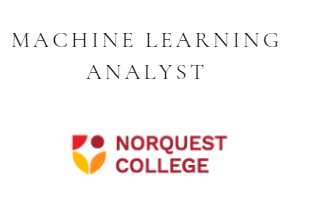

# **Understanding**


## **Exploratory Data Analysis (EDA) of NPRI Pollutant Releases**
This exploration data analysis (EDA) project aims to investigate and understand trends in pollution across Canada using the National Pollutant Release Inventory (NPRI). The NPRI dataset tracks pollution emissions from various industries and provides comprehensive data on how companies release pollutants into the environment. For this project, we will analyze three interconnected datasets: Release, Disposal, and Comments. Each of these datasets provides unique insights into the types of pollutants released, their disposal methods, and relevant comments assciated with the data.

**Understanding the Dataset:**

**1. 'Release 2000-2020' Dataset**: The Release Dataset captures the core information about pollutants released by companies into the environment over time. It contains detailed records of emissions into three primary environmental media: air, water, and land. The key features of this dataset include:

**Facility Information:**
- Reporting_Year: The year the release was reported.
- NPRI_ID: The unique ID assigned to each facility.
- Company_Name: Name of the company.
- Facility_Name: Name of the specific facility Multiple facilities may be owned by the same company.
- Number of employees: Employee count, indicating facility size.

**Industry and Location:**
- NAICS_Code: The North American Industry Classification System (NAICS) code,categorizing the industry type.
- NAICS_Title: Description of the NAICS code.
- PROVINCE: Province or territory where the facility is located. This helps with geographic analysis of emissions.
- City: The city of the facility.
- Latitude & Longitude: Geographic coordinates for mapping.

**Substance Information:**
- CAS_Number: Chemical Abstance (CAS) number for each substance.
- Substance_Name_EN: Name of the substance.
- Units: Measurement unit (e.g., tonnes, kilograms, grams, g TEQ).
- Estimation_Method: How the release data was estimated.

**Pollutant Release Pathways:**
- **Release_to_Air**: Including 'Release to Air - Fugitive', 'Release to Air - Other Non-Point', 'Release to Air - Road dust', 'Release to Air - Spills', 'Release to Air - Stack / Point', 'Release to Air - Storage / Handling'.
- **Release_to_Land**: including 'Releases to Land - Leaks', 'Releases to Land - Other', 'Releases to Land - Spills'.
- **Release_to_Water**: including 'Releases to Water Bodies - Direct Discharges', 'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills'

**Sum of release to all media '<'1 tonne**: Total emissions to air, land, and water for substances with less than 1 tonne of release."

**2. 'Disposals and Transfer 00-20' dataset**: constains information related to the off-site disposal and transfer of pollutants, distinct from the release dataset, which focuses on direct emissions to air, land, and water. Here are some key features:
- **Off-site Disposal**: means transporting waste from the facility to another location for safe disposal. Some common methods include: 'Land Treatment', 'Landfill', 'Storage', 'Tailings Management', 'Underground Injection', 'Waste Rock management'.
- **Off-site Transfers for Recycling**: refers to sending waste to recycling facilities where it can be reused. Examples include: 'Energy Recovery', 'Other', 'Recovery of Acids and Bases', 'Recovery of Catalysts', 'Recovery of Inorganic Materials (not metals)', 'Recovery of Metals and Metal Compounds', 'Recovery of Organic Substances (not solvents)', 'Recovery of Pollution Abatement Residues', 'Recovery of Solvents', 'Refining or Re-use of Used Oil'.
- **Off-site Transfers for Treatment Prior to Final Disposal**: before wate is finally disposed of, it may be sent for treatment to make it safer. Examples include: 'Biological Treatment', 'Chemical Treatment', 'Incineration / Thermal', 'Municipal Sewage Treatment Plant', 'Physical Treatment'.
- **On-site Disposal**: refers to waste that is managed directly at the facility where it was generated, without being transported off-site. Common methods include: 'Land Treatment', 'Landfill', 'Tailings Management', 'Underground Injection', 'Waste Rock management'.

**3. 'Comments' dataset**: provides explanations related to pollutant release and waste management reports submitted by facilities. The dataset is essential for understanding the reasons behind certain data trends.
- **Comment_Type_Name**: the type of comment provided, explanations for the release or disposal data.
- **Comment**: the actual comment text, which explains any unusual values, data changes, or other relevant details.



# For the Exploratory Data Analysis (EDA) of this project, the following steps will be taken to better understand the dataset:

**1. Data Cleaning:**
- Renaming Columns: renamed columns to ensure clarity and consitency. Simplified complex names for easier reference during analysis and modeling.
- Dropping Irrelevant Columns: Dropping some columns in the dataset that are not relevant to the analysis (examles: City, Lattitude and Longitude).
- Combining Columns: Aggregated release values across pathways (e.g., air Release_to_Air, Release_to_Water, Release_to_Land) wjere needed to create total release metrics for each province and year.
- Handling Missing Data: Identify columns with missing values and decide how to handle them.
- Standardizing Units: Checking to make sure the substance using for training having the same unit of measurement (tonnes) for consistency across the project.

**2. Descriptive Statistics:**
Distribution Analysis: Use visualizations to understand the distribution of the data and identify any outliers.

**3. Trend Analysis:**

**Yearly trends**: analyze the year-over-year changes in pollutant releases to identify whether the overall pollution levels are increasing or decreasing over time.

**Provincial Trends**: Break down pollutant trends by province to detect regional differences.

**Substance Trends**: Expolore trends for the top 5 substance over time.
- PM2.5 - Particulate Matter <= 2.5 Micrometers
- PM10 - Particulate Matter <= 10 Micrometers
- Nitrogen oxides (expressed as nitrogen dioxide)
- Carbon monoxide
- Volatile Organic Compounds (VOCs)

**4. Correlation and Pattern Detection:**

**Correlation Insights**:  
- Identify features strongly correlated with Total_Release or not
- Understand which features can be prioritized in modeling

**Pattern Observations**:
- Highlight recurring trends in pollution levels
- Provide context for observed pattern

**5. Visualization:**
- Pollution Over Time: Create line charts to visualize how total releases changed over the years by province
- Provincial Trends: Used bar charts to compare releases across province, identifying the highest contributors.
- Distribution Analysis: Plotted box plots and histograms to display the spread pollutant releases and detect outliers.

**6. Outlier Detection:**
- Identify Outliers: Used statisticall methods and visual tools to detect extreme values in pollutant releases.
- Handling Outliers: Applied Winsorization (1%-99% to cap extreme values without losing critical trends.



# How This EDA Supported Machine Learning
1. Data Preparation:
- Ensured the dataset was clean, consistent, and ready for modeling by handling missing values, standardizing units, and creating lagged features.
- Aggregated data to focus on meaningful metrics
2. Feature Engineering:
- Developed predictive features like lagged values (lag1, lag2) to incorporate historical trends into the models.
- Retained important categorical variables for encoding.
3. Insights for Model Selection:
- Identified key relationships and trends that guided model development
- Confirmed the relevance of features, ensuring models could focus on significant predictors.
4. Improved Interpretability:
- Provided visual and statistical insights that connected data trends to machine learning predictions, ensuring stakeholers understand the results.

**Outcome of EDA:**
- Cleaned and prepared a high-quality dataset optimized for time series regression.
- Created meaningful features that improved model performance
- Generated actionable insights into pollutant trends, helping to guide model interpretation and recommendations.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# loading the  csv data
df_Disposals_2000_2022 = pd.read_csv('Disposals and Transfers 00-20.csv')
df_Release_2000_2022 = pd.read_csv('Releases 2000-2020.csv')
df_Comment = pd.read_csv('Comment.csv')

<ipython-input-2-ca73b1e69727>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Disposals_2000_2022 = pd.read_csv('Disposals and Transfers 00-20.csv')
<ipython-input-2-ca73b1e69727>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Release_2000_2022 = pd.read_csv('Releases 2000-2020.csv')


In [ ]:
# Check duplicate from df_Disposals_2000_2022 - df_Release_2000_2022 - df_Comment datasets
# Check for duplicate rows
duplicate_rows_Disposal = df_Disposals_2000_2022.duplicated()
duplicate_rows_Release = df_Release_2000_2022.duplicated()
duplicate_rows_Comment = df_Comment.duplicated()

print("Number of duplicate rows:", duplicate_rows_Disposal.sum())
print("Number of duplicate rows:", duplicate_rows_Release.sum())
print("Number of duplicate rows:", duplicate_rows_Comment.sum())


Number of duplicate rows: 0
Number of duplicate rows: 0
Number of duplicate rows: 0


# Part 1: Cleaning Data for Comments and Disposal Dataset

In [ ]:
# Explore the df_Comment dataset
df_Comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

In [ ]:
# Check the columns of the Dataframe
print(df_Comment.columns)

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title EN / Titre Code SCIAN EN',
       'NAICS Title FR / Titre Code SCIAN FR', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Substance Name (French) / Nom de substance (Français)',
       'Comment_Type_Name (English) Type_de_commentaire (Anglais)',
       'Comment_Type_Name (French) Type_de_commentaire (Français)',
       'Comment / Commentaires'],
      dtype='object')


In [ ]:
# Rename Column in df_Comment
rename_Comment_dict = {
    'Reporting_Year / Année':'Reporting_Year',
    'NPRI_ID / No_INRP':'NPRI_ID',
    "Company_Name / Dénomination_sociale_de_l'entreprise":'Company_Name',
    'Facility_Name / Installation':'Facility_Name',
    'NAICS / Code_SCIAN':'NAICS_Code',
    'NAICS Title EN / Titre Code SCIAN EN':'NAICS_Title_EN',
    'NAICS Title FR / Titre Code SCIAN FR':'NAICS_Title_FR',
    'PROVINCE':'Province',
    'CAS_Number / No_CAS':'CAS_Number',
    'Substance Name (English) / Nom de substance (Anglais)':'Substance_Name_EN',
    'Substance Name (French) / Nom de substance (Français)':'Substance_Name_FR',
    'Comment_Type_Name (English) Type_de_commentaire (Anglais)':'Comment_Type_Name_EN',
    'Comment_Type_Name (French) Type_de_commentaire (Français)':'Comment_Type_Name_FR',
    'Comment / Commentaires':'Comment',
}
# renaming the columns
df_Comment.rename(columns=rename_Comment_dict, inplace=True)
# Check missing values
missing_values_Comment = df_Comment.isnull().sum()
print("missing values in each column:\n",missing_values_Comment)

missing values in each column:
 Reporting_Year             0
NPRI_ID                    0
Company_Name               0
Facility_Name           4005
NAICS_Code                 0
NAICS_Title_EN            16
NAICS_Title_FR            16
Province                   0
CAS_Number                 0
Substance_Name_EN          0
Substance_Name_FR          0
Comment_Type_Name_EN       0
Comment_Type_Name_FR       0
Comment                 4275
dtype: int64


In [ ]:
# update column to categories
df_Comment['Province'] = pd.Categorical(df_Comment['Province'])
df_Comment['NAICS_Code'] = pd.Categorical(df_Comment['NAICS_Code'])
df_Comment['NAICS_Title_EN'] = pd.Categorical(df_Comment['NAICS_Title_EN'])
df_Comment['NAICS_Title_FR'] = pd.Categorical(df_Comment['NAICS_Title_FR'])
df_Comment['Substance_Name_EN'] = pd.Categorical(df_Comment['Substance_Name_EN'])
df_Comment['Substance_Name_FR'] = pd.Categorical(df_Comment['Substance_Name_FR'])
df_Comment['Comment_Type_Name_EN'] = pd.Categorical(df_Comment['Comment_Type_Name_EN'])
df_Comment['Comment_Type_Name_FR'] = pd.Categorical(df_Comment['Comment_Type_Name_FR'])
df_Comment.dtypes

Reporting_Year             int64
NPRI_ID                    int64
Company_Name              object
Facility_Name             object
NAICS_Code              category
NAICS_Title_EN          category
NAICS_Title_FR          category
Province                category
CAS_Number                object
Substance_Name_EN       category
Substance_Name_FR       category
Comment_Type_Name_EN    category
Comment_Type_Name_FR    category
Comment                   object
dtype: object

In [ ]:
# Explore the df_Disposals_2000_2022 dataset
df_Disposals_2000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

In [ ]:
# Rename Column in df_Disposals_2000_2022:clarity, realdability, avoid errors in data handling
rename_dict = {
    'Reporting_Year / Année':'Reporting_Year',
    'NPRI_ID / No_INRP':'NPRI_ID',
    'Number of employees':'Number_of_employees',
    "Company_Name / Dénomination_sociale_de_l'entreprise":'Company_Name',
    'Facility_Name / Installation':'Facility_Name',
    'NAICS / Code_SCIAN':'NAICS_Code',
    'NAICS Title / Titre Code_SCIAN':'NAICS_Title',
    'PROVINCE':'Province',
    'CAS_Number / No_CAS':'CAS_Number',
    "Substance Name (English) / Nom de substance (Anglais)":'Substance_Name_EN',
    'Units / Unités':'Units',
    'Estimation_Method / Méthode_d’estimation':'Estimation_Method',
}
# renaming the columns
df_Disposals_2000_2022.rename(columns=rename_dict, inplace=True)
df_Disposals_2000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year                                                                               191645 non-null  int64  
 1   NPRI_ID                                                                                      191645 non-null  int64  
 2   Number_of_employees                                                                          191551 non-null  object 
 3   Company_Name                                                                                 191645 non-null  object 
 4   Facility_Name                                                                                191019 non-null  object 
 5   NAICS_Code             

In [ ]:
# Changing province to categories
df_Disposals_2000_2022['Province'] = pd.Categorical(df_Disposals_2000_2022['Province'])
df_Disposals_2000_2022['Units'] = pd.Categorical(df_Disposals_2000_2022['Units'])
df_Disposals_2000_2022['Estimation_Method'] = pd.Categorical(df_Disposals_2000_2022['Estimation_Method'])
df_Disposals_2000_2022.dtypes

Reporting_Year                                                                                    int64
NPRI_ID                                                                                           int64
Number_of_employees                                                                              object
Company_Name                                                                                     object
Facility_Name                                                                                    object
NAICS_Code                                                                                        int64
NAICS_Title                                                                                      object
Province                                                                                       category
City                                                                                             object
Latitude                                                                                        float64
Longitude                                                                                       float64
CAS_Number                                                                                       object
Substance_Name_EN                                                                                object
Units                                                                                          category
Estimation_Method                                                                              category
Off-site Disposal - Land Treatment                                                              float64
Off-site Disposal - Landfill                                                                    float64
Off-site Disposal - Storage                                                                     float64
Off-site Disposal - Tailings Management                                                         float64
Off-site Disposal - Underground Injection                                                       float64
Off-site Disposal - Waste Rock management                                                       float64
Off-site Transfers for Recycling - Energy Recovery                                              float64
Off-site Transfers for Recycling - Other                                                        float64
Off-site Transfers for Recycling - Recovery of Acids and Bases                                  float64
Off-site Transfers for Recycling - Recovery of Catalysts                                        float64
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                 float64
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                       float64
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)                float64
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                     float64
Off-site Transfers for Recycling - Recovery of Solvents                                         float64
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                               float64
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                 float64
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                   float64
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal               float64
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant     float64
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                   float64
On-site Disposal - Land Treatment                                                               float64
On-site Disposal - Landfill                                                                     float64
On-site Disposal - Tailings Management          

In [ ]:
# Check missing values
missing_values = df_Disposals_2000_2022.isnull().sum()
print("missing values in each column:\n", missing_values)

missing values in each column:
 Reporting_Year                                                                                      0
NPRI_ID                                                                                             0
Number_of_employees                                                                                94
Company_Name                                                                                        0
Facility_Name                                                                                     626
NAICS_Code                                                                                          0
NAICS_Title                                                                                         0
Province                                                                                            0
City                                                                                             3739
Latitude                                          

In [ ]:
# Changing 'Number_of_employees' to numeric type
df_Disposals_2000_2022['Number_of_employees'] = pd.to_numeric(df_Disposals_2000_2022['Number_of_employees'], errors='coerce')


# Filling missing value for 'Number_of_employees' by using mean
df_Disposals_2000_2022['Number_of_employees'].replace(0, np.nan, inplace=True)
missing_employees = df_Disposals_2000_2022['Number_of_employees'].mean()
df_Disposals_2000_2022['Number_of_employees'].fillna(missing_employees, inplace=True)

<ipython-input-12-bd3354caed3d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Disposals_2000_2022['Number_of_employees'].replace(0, np.nan, inplace=True)
<ipython-input-12-bd3354caed3d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
df_Disposals_2000_2022['Number_of_employees'] = df_Disposals_2000_2022['Number_of_employees'].astype(int)
df_Disposals_2000_2022.dtypes

Reporting_Year                                                                                    int64
NPRI_ID                                                                                           int64
Number_of_employees                                                                               int64
Company_Name                                                                                     object
Facility_Name                                                                                    object
NAICS_Code                                                                                        int64
NAICS_Title                                                                                      object
Province                                                                                       category
City                                                                                             object
Latitude                                                                                        float64
Longitude                                                                                       float64
CAS_Number                                                                                       object
Substance_Name_EN                                                                                object
Units                                                                                          category
Estimation_Method                                                                              category
Off-site Disposal - Land Treatment                                                              float64
Off-site Disposal - Landfill                                                                    float64
Off-site Disposal - Storage                                                                     float64
Off-site Disposal - Tailings Management                                                         float64
Off-site Disposal - Underground Injection                                                       float64
Off-site Disposal - Waste Rock management                                                       float64
Off-site Transfers for Recycling - Energy Recovery                                              float64
Off-site Transfers for Recycling - Other                                                        float64
Off-site Transfers for Recycling - Recovery of Acids and Bases                                  float64
Off-site Transfers for Recycling - Recovery of Catalysts                                        float64
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                 float64
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                       float64
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)                float64
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                     float64
Off-site Transfers for Recycling - Recovery of Solvents                                         float64
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                               float64
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                 float64
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                   float64
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal               float64
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant     float64
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                   float64
On-site Disposal - Land Treatment                                                               float64
On-site Disposal - Landfill                                                                     float64
On-site Disposal - Tailings Management          

In [ ]:
#Display 'Facility_Name' missing value fill by 'Company_Name'
#Replace the '(blank)' strings with NaN:
df_Disposals_2000_2022['Facility_Name'].replace(('(blank)'), np.nan, inplace=True)
missing_facility = df_Disposals_2000_2022[df_Disposals_2000_2022['Facility_Name'].isnull()]
print(missing_facility[['Facility_Name', 'Company_Name']])
print(df_Disposals_2000_2022[['Facility_Name', 'Company_Name']])

# Filling missing value of 'Facility_Name' - because we can see there are many company have the same Company_Name with Facility_Name
df_Disposals_2000_2022['Facility_Name'].fillna(df_Disposals_2000_2022['Company_Name'], inplace=True)
print(df_Disposals_2000_2022[['Facility_Name', 'Company_Name']])

       Facility_Name                            Company_Name
0                NaN  Alberta-Pacific Forest Industries Inc.
1                NaN  Alberta-Pacific Forest Industries Inc.
48               NaN                    BOMBARDIER TRANSPORT
49               NaN                    BOMBARDIER TRANSPORT
50               NaN                    BOMBARDIER TRANSPORT
...              ...                                     ...
180835           NaN                    DURAPAINT INDUSTRIES
189277           NaN                    DURAPAINT INDUSTRIES
189278           NaN                    DURAPAINT INDUSTRIES
189279           NaN                    DURAPAINT INDUSTRIES
189280           NaN                    DURAPAINT INDUSTRIES

[6190 rows x 2 columns]
               Facility_Name                            Company_Name
0                        NaN  Alberta-Pacific Forest Industries Inc.
1                        NaN  Alberta-Pacific Forest Industries Inc.
2                 Pine Falls        

<ipython-input-14-d795eca36a56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Disposals_2000_2022['Facility_Name'].replace(('(blank)'), np.nan, inplace=True)
<ipython-input-14-d795eca36a56>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
# Dropping columns 'City', 'Latitude', 'Longitude' - due to our group problem, these feature are irrelevant to the problem statement
df_Disposals_2000_2022 = df_Disposals_2000_2022.drop(columns=['City', 'Latitude', 'Longitude'])
# Check columns again after dropping
df_Disposals_2000_2022.isnull().sum()

Reporting_Year                                                                                      0
NPRI_ID                                                                                             0
Number_of_employees                                                                                 0
Company_Name                                                                                        0
Facility_Name                                                                                       0
NAICS_Code                                                                                          0
NAICS_Title                                                                                         0
Province                                                                                            0
CAS_Number                                                                                          0
Substance_Name_EN                                                                                   0
Units                                                                                               0
Estimation_Method                                                                                   0
Off-site Disposal - Land Treatment                                                             180724
Off-site Disposal - Landfill                                                                   135916
Off-site Disposal - Storage                                                                    185711
Off-site Disposal - Tailings Management                                                        191304
Off-site Disposal - Underground Injection                                                      183415
Off-site Disposal - Waste Rock management                                                      191507
Off-site Transfers for Recycling - Energy Recovery                                             181878
Off-site Transfers for Recycling - Other                                                       181224
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 190801
Off-site Transfers for Recycling - Recovery of Catalysts                                       190208
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                189898
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      161717
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               183080
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    189496
Off-site Transfers for Recycling - Recovery of Solvents                                        181281
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              187652
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                188516
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  179013
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              166954
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    175238
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  181681
On-site Disposal - Land Treatment                                                              187774
On-site Disposal - Landfill                                                                    173375
On-site Disposal - Tailings Management                                                         175573
On-site Disposal - Underground Injection                                                       182316
On-site Disposal - Waste Rock management                                                       187263
dtype: int64

In [ ]:
# List of columns to sum for different disposals and transfers
Off_site_disposal_columns = [
    'Off-site Disposal - Land Treatment',
    'Off-site Disposal - Landfill',
    'Off-site Disposal - Storage',
    'Off-site Disposal - Tailings Management',
    'Off-site Disposal - Underground Injection',
    'Off-site Disposal - Waste Rock management'
]
Off_site_Transfers_columns = [
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Acids and Bases',
    'Off-site Transfers for Recycling - Recovery of Catalysts',
    'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
    'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
    'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
    'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment'
]
On_site_Disposal_columns = [
    'On-site Disposal - Land Treatment',
    'On-site Disposal - Landfill',
    'On-site Disposal - Tailings Management',
    'On-site Disposal - Underground Injection',
    'On-site Disposal - Waste Rock management'
]
# Create new columns for Off-site, On-site, and Total Disposal summing across the respective columns
df_Disposals_2000_2022['Off_site_Disposal'] = df_Disposals_2000_2022[Off_site_disposal_columns].sum(axis=1)
df_Disposals_2000_2022['Off_site_Transfers'] = df_Disposals_2000_2022[Off_site_Transfers_columns].sum(axis=1)
df_Disposals_2000_2022['On_site_Disposal'] = df_Disposals_2000_2022[On_site_Disposal_columns].sum(axis=1)
df_Disposals_2000_2022['Total_Disposal'] = (
    df_Disposals_2000_2022['Off_site_Disposal'] +
    df_Disposals_2000_2022['Off_site_Transfers'] +
    df_Disposals_2000_2022['On_site_Disposal']
)
# Drop the original columns after summation
df_Disposals_2000_2022 = df_Disposals_2000_2022.drop(columns=Off_site_disposal_columns + Off_site_Transfers_columns + On_site_Disposal_columns)

# Show the results to check the update
print(df_Disposals_2000_2022[['Off_site_Disposal', 'Off_site_Transfers', 'On_site_Disposal', 'Total_Disposal','Total_Disposal' ]].head(10))

   Off_site_Disposal  Off_site_Transfers  On_site_Disposal  Total_Disposal  \
0              0.000               0.000              9.07           9.070   
1              0.000               0.000             27.38          27.380   
2              0.000               0.000              2.73           2.730   
3              0.000               0.000              5.70           5.700   
4              0.000               0.000              0.04           0.040   
5              0.001               0.000              0.00           0.001   
6              0.001               0.011              0.00           0.012   
7              2.000               0.011              0.00           2.011   
8              0.014               0.000              0.00           0.014   
9              0.019               0.000              0.00           0.019   

   Total_Disposal  
0           9.070  
1          27.380  
2           2.730  
3           5.700  
4           0.040  
5           0.001  
6

In [ ]:
# Check columns again after dropping
df_Disposals_2000_2022.isnull().sum()

Reporting_Year         0
NPRI_ID                0
Number_of_employees    0
Company_Name           0
Facility_Name          0
NAICS_Code             0
NAICS_Title            0
Province               0
CAS_Number             0
Substance_Name_EN      0
Units                  0
Estimation_Method      0
Off_site_Disposal      0
Off_site_Transfers     0
On_site_Disposal       0
Total_Disposal         0
dtype: int64

In [ ]:
# Check for missing values
missing_values_Disposal = df_Disposals_2000_2022.isnull().sum()
zero_values_Diposal = (df_Disposals_2000_2022 == 0).sum()

# Combine both results into a DataFrane for easier viewing - Showing the Zero value, this is useful for the fitting model of machine learning
check_values_Disposal = pd.DataFrame({'Missing Values': missing_values_Disposal, 'Zero Values': zero_values_Diposal})
print(check_values_Disposal)

                     Missing Values  Zero Values
Reporting_Year                    0            0
NPRI_ID                           0            0
Number_of_employees               0            0
Company_Name                      0            0
Facility_Name                     0            0
NAICS_Code                        0            0
NAICS_Title                       0            0
Province                          0            0
CAS_Number                        0            0
Substance_Name_EN                 0            0
Units                             0            0
Estimation_Method                 0            0
Off_site_Disposal                 0       122509
Off_site_Transfers                0        81327
On_site_Disposal                  0       147282
Total_Disposal                    0         5608


In [ ]:
df_Disposals_2000_2022.shape

(191645, 16)

# Handling Outliers with Winsorization

The code uses the 99th percentile as the threshold for identifying outliers. Any value above this threshold is considered an outlier. Outliers are then replaced or "capped" at the 99th percentile value. This prevents extreme values from skewing the data distribution and affecting subsequent analysis.

In [ ]:
numerical_features = ['Number_of_employees', 'Off_site_Disposal', 'Off_site_Transfers', 'On_site_Disposal', 'Total_Disposal']

for feature in numerical_features:
    # Convert the feature column to numeric, coercing errors to NaN
    df_Disposals_2000_2022[feature] = pd.to_numeric(df_Disposals_2000_2022[feature], errors='coerce')
    # Create a copy of data
    df_Disposals_2000_2022_copy = df_Disposals_2000_2022.copy()
    # Calculate the upper limit after converting to numeric
    upper_limit = df_Disposals_2000_2022_copy[feature].quantile(0.99)

    # Apply the upper limit to the numeric column
    df_Disposals_2000_2022_copy[feature] = df_Disposals_2000_2022_copy[feature].apply(lambda x: upper_limit if x > upper_limit else x)

    # Count and print the total number of outliers
    num_outliers = len(df_Disposals_2000_2022_copy[df_Disposals_2000_2022_copy[feature] == upper_limit])
    print(f"Total number of outliers for {feature}: {num_outliers}\n")

Total number of outliers for Number_of_employees: 1918

Total number of outliers for Off_site_Disposal: 1917

Total number of outliers for Off_site_Transfers: 1917

Total number of outliers for On_site_Disposal: 1917

Total number of outliers for Total_Disposal: 1917



# Handling Outlier by using Standardization

- Normalization (MinMaxScaler) is useful when you need to bound the features within a specific range, such as when working with algorithms sensitive to feature ranges (e.g., neural networks).
- Standardization (StandardScaler) is useful when you want to ensure features have a similar range of influence and when algorithms rely on the assumption of a normal distribution (e.g., linear regression, logistic regression).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the numerical features to be normalized
numerical_features = ['Number_of_employees', 'Off_site_Disposal', 'Off_site_Transfers', 'On_site_Disposal', 'Total_Disposal']

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply normalization
df_Disposals_2000_2022[numerical_features] = scaler.fit_transform(df_Disposals_2000_2022[numerical_features])

# Print the normalized data summary
print("Normalized Data Summary:")
print(df_Disposals_2000_2022[numerical_features].describe())


Normalized Data Summary:
       Number_of_employees  Off_site_Disposal  Off_site_Transfers  \
count         1.916450e+05       1.916450e+05        1.916450e+05   
mean          2.372863e-18      -1.297660e-18       -4.449118e-19   
std           1.000003e+00       1.000003e+00        1.000003e+00   
min          -2.868666e-01      -3.115098e-02       -1.387130e-02   
25%          -2.657676e-01      -3.115098e-02       -1.387130e-02   
50%          -2.049529e-01      -3.115098e-02       -1.387115e-02   
75%          -3.243770e-02      -3.113458e-02       -1.384509e-02   
max           1.312299e+02       1.867602e+02        1.253304e+02   

       On_site_Disposal  Total_Disposal  
count      1.916450e+05    1.916450e+05  
mean       1.186432e-17    3.410991e-18  
std        1.000003e+00    1.000003e+00  
min       -1.219280e-01   -7.422025e-02  
25%       -3.114206e-02   -2.874522e-02  
50%       -3.114206e-02   -2.872355e-02  
75%       -3.114206e-02   -2.857240e-02  
max        1.4631

Usisng StandardScaler for pollutant release prediction can introduce challenges and is not ideal for this type of data.
- Negative values are not meaningful for dataset: becasue it centers the data around the mean and scalers it based on the standard deviation; however, the pollant cannot be negative. This can lead to confusion, especially when presenting results to stakeholders or integrating with other analyses. Models trained on such data might struggle with interpretability since scaled features lose real-world meaning.


# Release Dataset

In [ ]:
# Explore the df_Release_2000_2022 dataset
df_Release_2000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [ ]:
# Rename Column in df_Release_2000_2022
rename_Release_dict = {
    'Reporting_Year / Année':'Reporting_Year',
    'NPRI_ID / No_INRP': 'NPRI_ID',
    ' NPRI_ID / No_INRP':'NPRI_ID',
    'Number of employees':'Number_of_employees',
    "Company_Name / Dénomination_sociale_de_l'entreprise":'Company_Name',
    'Facility_Name / Installation':'Facility_Name',
    'NAICS / Code_SCIAN':'NAICS_Code',
    'NAICS Title / Titre Code_SCIAN':'NAICS_Title',
    'PROVINCE':'Province',
    'CAS_Number / No_CAS':'CAS_Number',
    "Substance Name (English) / Nom de substance (Anglais)":'Substance_Name_EN',
    'Units / Unités':'Units',
    'Estimation_Method / Méthode_d’estimation':'Estimation_Method',
}
# renaming the columns
df_Release_2000_2022.rename(columns=rename_Release_dict, inplace=True)
df_Release_2000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Reporting_Year                                 737516 non-null  int64  
 1   NPRI_ID                                        737516 non-null  int64  
 2   Number_of_employees                            736900 non-null  object 
 3   Company_Name                                   737516 non-null  object 
 4   Facility_Name                                  736340 non-null  object 
 5   NAICS_Code                                     737516 non-null  int64  
 6   NAICS_Title                                    737516 non-null  object 
 7   Province                                       737516 non-null  object 
 8   City                                           646752 non-null  object 
 9   Latitude                             

In [ ]:
# Changing 'Province', 'Units',  'Estimation_Method', 'Substance_Name_EN' to categories
df_Release_2000_2022['Province'] = pd.Categorical(df_Release_2000_2022['Province'])
df_Release_2000_2022['Units'] = pd.Categorical(df_Release_2000_2022['Units'])
df_Release_2000_2022['Estimation_Method'] = pd.Categorical(df_Release_2000_2022['Estimation_Method'])
df_Release_2000_2022['Substance_Name_EN'] = pd.Categorical(df_Release_2000_2022['Substance_Name_EN'])
df_Release_2000_2022.dtypes

Reporting_Year                                      int64
NPRI_ID                                             int64
Number_of_employees                                object
Company_Name                                       object
Facility_Name                                      object
NAICS_Code                                          int64
NAICS_Title                                        object
Province                                         category
City                                               object
Latitude                                          float64
Longitude                                         float64
CAS_Number                                         object
Substance_Name_EN                                category
Units                                            category
Estimation_Method                                category
Release to Air - Fugitive                         float64
Release to Air - Other Non-Point                  float64
Release to Air - Road dust                        float64
Release to Air - Spills                           float64
Release to Air - Stack / Point                    float64
Release to Air - Storage / Handling               float64
Releases to Land - Leaks                          float64
Releases to Land - Other                          float64
Releases to Land - Spills                         float64
Releases to Water Bodies - Direct Discharges      float64
Releases to Water Bodies - Leaks                  float64
Releases to Water Bodies - Spills                 float64
Sum of release to all media (<1tonne)             float64
dtype: object

In [ ]:
# Changing 'Number_of_employees' to numeric type
df_Release_2000_2022['Number_of_employees'] = pd.to_numeric(df_Release_2000_2022['Number_of_employees'], errors='coerce')
# Filling missing value for 'Number_of_employees' by using mean
df_Release_2000_2022['Number_of_employees'].replace(0, np.nan, inplace=True)
missing_employees_Release = df_Release_2000_2022['Number_of_employees'].mean()
df_Release_2000_2022['Number_of_employees'].fillna(missing_employees_Release, inplace=True)
# Check missing values
missing_values_Release = df_Release_2000_2022.isnull().sum()
print("missing values in each column:\n", missing_values_Release)

<ipython-input-25-7ae5ccd59bae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Release_2000_2022['Number_of_employees'].replace(0, np.nan, inplace=True)
<ipython-input-25-7ae5ccd59bae>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

missing values in each column:
 Reporting_Year                                        0
NPRI_ID                                               0
Number_of_employees                                   0
Company_Name                                          0
Facility_Name                                      1176
NAICS_Code                                            0
NAICS_Title                                           0
Province                                              0
City                                              90764
Latitude                                           4082
Longitude                                          4082
CAS_Number                                            0
Substance_Name_EN                                     0
Units                                                 0
Estimation_Method                                     0
Release to Air - Fugitive                        612484
Release to Air - Other Non-Point                 706636
Release to Air -

In [ ]:
df_Release_2000_2022['Number_of_employees'] = df_Release_2000_2022['Number_of_employees'].astype(int)
df_Release_2000_2022.dtypes

Reporting_Year                                      int64
NPRI_ID                                             int64
Number_of_employees                                 int64
Company_Name                                       object
Facility_Name                                      object
NAICS_Code                                          int64
NAICS_Title                                        object
Province                                         category
City                                               object
Latitude                                          float64
Longitude                                         float64
CAS_Number                                         object
Substance_Name_EN                                category
Units                                            category
Estimation_Method                                category
Release to Air - Fugitive                         float64
Release to Air - Other Non-Point                  float64
Release to Air - Road dust                        float64
Release to Air - Spills                           float64
Release to Air - Stack / Point                    float64
Release to Air - Storage / Handling               float64
Releases to Land - Leaks                          float64
Releases to Land - Other                          float64
Releases to Land - Spills                         float64
Releases to Water Bodies - Direct Discharges      float64
Releases to Water Bodies - Leaks                  float64
Releases to Water Bodies - Spills                 float64
Sum of release to all media (<1tonne)             float64
dtype: object

There are some similar or relative between 'Facility_Name' and 'Company_Name'. Filla by Company name can be applied

In [ ]:
#Display 'Facility_Name' missing value fill by 'Company_Name'
#Replace the '(blank)' strings with NaN:
df_Release_2000_2022['Facility_Name'].replace(('(blank)'), np.nan, inplace=True)
missing_facility_Release = df_Release_2000_2022[df_Release_2000_2022['Facility_Name'].isnull()]
print(missing_facility_Release[['Facility_Name', 'Company_Name']])
print(df_Release_2000_2022[['Facility_Name', 'Company_Name']])
# Filling missing value of 'Facility_Name'
df_Release_2000_2022['Facility_Name'].fillna(df_Release_2000_2022['Company_Name'], inplace=True)
print(df_Release_2000_2022[['Facility_Name', 'Company_Name']])

<ipython-input-27-06f95a0c4332>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Release_2000_2022['Facility_Name'].replace(('(blank)'), np.nan, inplace=True)


       Facility_Name                            Company_Name
0                NaN  Alberta-Pacific Forest Industries Inc.
1                NaN  Alberta-Pacific Forest Industries Inc.
2                NaN  Alberta-Pacific Forest Industries Inc.
3                NaN  Alberta-Pacific Forest Industries Inc.
4                NaN  Alberta-Pacific Forest Industries Inc.
...              ...                                     ...
711724           NaN                    Durapaint Industries
711725           NaN                    Durapaint Industries
711726           NaN                    Durapaint Industries
711727           NaN                    Durapaint Industries
711728           NaN                    Durapaint Industries

[11399 rows x 2 columns]
                 Facility_Name                            Company_Name
0                          NaN  Alberta-Pacific Forest Industries Inc.
1                          NaN  Alberta-Pacific Forest Industries Inc.
2                          Na

<ipython-input-27-06f95a0c4332>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Release_2000_2022['Facility_Name'].fillna(df_Release_2000_2022['Company_Name'], inplace=True)


In [ ]:
# Dropping columns 'City', 'Latitude', 'Longitude'
df_Release_2000_2022 = df_Release_2000_2022.drop(columns=['City', 'Latitude', 'Longitude'])
# Check columns again after dropping
df_Release_2000_2022.isnull().sum()

Reporting_Year                                        0
NPRI_ID                                               0
Number_of_employees                                   0
Company_Name                                          0
Facility_Name                                         0
NAICS_Code                                            0
NAICS_Title                                           0
Province                                              0
CAS_Number                                            0
Substance_Name_EN                                     0
Units                                                 0
Estimation_Method                                     0
Release to Air - Fugitive                        612484
Release to Air - Other Non-Point                 706636
Release to Air - Road dust                       707655
Release to Air - Spills                          728335
Release to Air - Stack / Point                   224234
Release to Air - Storage / Handling              657512
Releases to Land - Leaks                         736606
Releases to Land - Other                         731848
Releases to Land - Spills                        733046
Releases to Water Bodies - Direct Discharges     684328
Releases to Water Bodies - Leaks                 736774
Releases to Water Bodies - Spills                734436
Sum of release to all media (<1tonne)            687331
dtype: int64

In [ ]:
# Check the columns of the Dataframe
print(df_Release_2000_2022.columns.tolist())

['Reporting_Year', 'NPRI_ID', 'Number_of_employees', 'Company_Name', 'Facility_Name', 'NAICS_Code', 'NAICS_Title', 'Province', 'CAS_Number', 'Substance_Name_EN', 'Units', 'Estimation_Method', 'Release to Air - Fugitive', 'Release to Air - Other Non-Point ', 'Release to Air - Road dust  ', 'Release to Air - Spills ', 'Release to Air - Stack / Point  ', 'Release to Air - Storage / Handling ', 'Releases to Land - Leaks', 'Releases to Land - Other ', 'Releases to Land - Spills ', 'Releases to Water Bodies - Direct Discharges ', 'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills ', 'Sum of release to all media (<1tonne)']


In [ ]:
# List of columns for different types of releases
Release_to_Air_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point ',
    'Release to Air - Road dust  ',
    'Release to Air - Spills ',
    'Release to Air - Stack / Point  ',
    'Release to Air - Storage / Handling '
]
Release_to_Land_columns = [
    'Releases to Land - Leaks',
    'Releases to Land - Other ',
    'Releases to Land - Spills '
]
Release_to_Water_columns = [
    'Releases to Water Bodies - Direct Discharges ',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills '
]
Release_less_1_tonnes_columns = [
    'Sum of release to all media (<1tonne)'
]
# Sum up release values for each type and apply unit conversion
df_Release_2000_2022['Release_to_Air'] = df_Release_2000_2022[Release_to_Air_columns].sum(axis=1)
df_Release_2000_2022['Release_to_Land'] = df_Release_2000_2022[Release_to_Land_columns].sum(axis=1)
df_Release_2000_2022['Release_to_Water'] = df_Release_2000_2022[Release_to_Water_columns].sum(axis=1)
df_Release_2000_2022['Release_less_1_tonnes'] = df_Release_2000_2022[Release_less_1_tonnes_columns].sum(axis=1)
df_Release_2000_2022['Total_Release'] = (
    df_Release_2000_2022['Release_to_Air'] +
    df_Release_2000_2022['Release_to_Land'] +
    df_Release_2000_2022['Release_to_Water'] +
    df_Release_2000_2022['Release_less_1_tonnes']
)
# Drop original release columns after summation and conversion
df_Release_2000_2022 = df_Release_2000_2022.drop(columns=Release_to_Air_columns + Release_to_Land_columns + Release_to_Water_columns + Release_less_1_tonnes_columns)

# Show the final DataFrame with converted release values
print(df_Release_2000_2022[['Release_to_Air', 'Release_to_Land', 'Release_to_Water', 'Release_less_1_tonnes','Total_Release']].head(10))

   Release_to_Air  Release_to_Land  Release_to_Water  Release_less_1_tonnes  \
0           5.200              0.0              0.00                    0.0   
1         113.000              0.0              0.00                    0.0   
2           0.000              0.0              0.00                    0.0   
3           7.670              0.0              0.00                    0.0   
4           0.665              0.0              0.00                    0.0   
5           0.000              0.0              0.00                    0.0   
6           0.000              0.0              0.00                    0.0   
7           0.452              0.0              0.00                    0.0   
8           0.000              0.0              2.61                    0.0   
9           0.000              0.0              1.26                    0.0   

   Total_Release  
0          5.200  
1        113.000  
2          0.000  
3          7.670  
4          0.665  
5          0.000

In [ ]:
# Check columns again after dropping
df_Release_2000_2022.isnull().sum()

Reporting_Year           0
NPRI_ID                  0
Number_of_employees      0
Company_Name             0
Facility_Name            0
NAICS_Code               0
NAICS_Title              0
Province                 0
CAS_Number               0
Substance_Name_EN        0
Units                    0
Estimation_Method        0
Release_to_Air           0
Release_to_Land          0
Release_to_Water         0
Release_less_1_tonnes    0
Total_Release            0
dtype: int64

In [ ]:
# Check for missing values
missing_values = df_Release_2000_2022.isnull().sum()
zero_values = (df_Release_2000_2022 == 0).sum()

# Combine both results into a DataFrane for easier viewing
check_values = pd.DataFrame({'Missing Values': missing_values, 'Zero Values': zero_values})
print(check_values)

                       Missing Values  Zero Values
Reporting_Year                      0            0
NPRI_ID                             0            0
Number_of_employees                 0            0
Company_Name                        0            0
Facility_Name                       0            0
NAICS_Code                          0            0
NAICS_Title                         0            0
Province                            0            0
CAS_Number                          0            0
Substance_Name_EN                   0            0
Units                               0            0
Estimation_Method                   0            0
Release_to_Air                      0       117433
Release_to_Land                     0       729993
Release_to_Water                    0       686954
Release_less_1_tonnes               0       693254
Total_Release                       0        34547


In [ ]:
df_Release_2000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Reporting_Year         737516 non-null  int64   
 1   NPRI_ID                737516 non-null  int64   
 2   Number_of_employees    737516 non-null  int64   
 3   Company_Name           737516 non-null  object  
 4   Facility_Name          737516 non-null  object  
 5   NAICS_Code             737516 non-null  int64   
 6   NAICS_Title            737516 non-null  object  
 7   Province               737516 non-null  category
 8   CAS_Number             737516 non-null  object  
 9   Substance_Name_EN      737516 non-null  category
 10  Units                  737516 non-null  category
 11  Estimation_Method      737516 non-null  category
 12  Release_to_Air         737516 non-null  float64 
 13  Release_to_Land        737516 non-null  float64 
 14  Release_to_Water    

# New dataset for merging


Merging:
- Importing new dataset NPRI-INRP_Air_OtherAutres_Substances_MediaGroupMilieu_2023.csv from STATCAN from https://open.canada.ca/data/en/dataset/22abff18-6f9d-4926-b7de-3a80c178bf95/resource/1688d0a0-8bed-4795-97ff-dba402b4e796
- The dataset contains the Total Release to Air in 2023
- Each company can produce different kind of substance. The total release to air is for all substance.
- **Reason for using the new dataset**: To compare the predicted air release of each substance with the actual release in 2023 and calculate the percentage contribution of each substance to the total release to air in the new dataset. This helps validate model predictions and assess the significance of each substance's emissions


In [ ]:
# Importing the geolocations into a dataframe. Encoding is different so set encoding to ISO to fix it, and low memory to avoid warning about duel datatypes.
Geo = pd.read_csv('NPRI-INRP_Air_OtherAutres_Substances_MediaGroupMilieu_2023.csv', encoding='ISO-8859-1', low_memory=False)

In [ ]:
Geo.head()

Reporting_Year / Année_Déclaration  NPRI_ID / No_INRP  \
0                                2023                  1   
1                                2023                 11   
2                                2023                 15   
3                                2023                 21   
4                                2023                 31   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1                                 Hexion Canada Inc.    
2                          Dofasco Inc., Stelco Inc.    
3             Sunaar Steel Tube and Galvanizing Inc.    
4                                   BASF Canada Inc.    

             Facility_Name / Installation          Address / Adresse  \
0  Alberta-Pacific Forest Industries Inc.                        NaN   
1   Hexion Canada Inc.- Edmonton Facility         12621 156th Street   
2                                 Baycoat          244 Lanark Street   
3                            Bolton Plant           455 Piercey Road   
4                            Windsor Site  845 Wyandotte Street West   

          City / Ville Province / Province  Latitude / Latitude  \
0  County of Athabasca                  AB            54.923116   
1             Edmonton                  AB            53.582300   
2             Hamilton                  ON            43.241190   
3               Bolton                  ON            43.866690   
4              Windsor                  ON            42.310520   

   Longitude / Longitude  Datum / Datum  ...  \
0            -112.861867         1983.0  ...   
1            -113.588600         1983.0  ...   
2             -79.749450         1983.0  ...   
3             -79.731710         1983.0  ...   
4             -83.046120         1983.0  ...   

   NAICS 4 Sector Name (English) / Nom de secteur SCIAN 4 (Anglais)  \
0                   Pulp, paper and paperboard mills                  
1  Resin, synthetic rubber, and artificial and sy...                  
2  Coating, engraving, cold and heat treating and...                  
3   Steel product manufacturing from purchased steel                  
4          Paint, coating and adhesive manufacturing                  

  NAICS 4 Sector Name (French) / Nom de secteur SCIAN 4 (Français)  \
0    Usines de pâte à papier, de papier et de carton                 
1  Fabrication de résines, de caoutchouc synthéti...                 
2  Revêtement, gravure, traitement thermique et p...                 
3  Fabrication de produits en acier à partir d'ac...                 
4  Fabrication de peintures, de revêtements et d'...                 

  NAICS 6 Code / SCIAN 6 Chiffre  \
0                         322112   
1                         325210   
2                         332810   
3                         331210   
4                         325510   

   NAICS 6 Sector Name (English) / Nom de secteur SCIAN 6 (Anglais)  \
0                                Chemical pulp mills                  
1           Resin and synthetic rubber manufacturing                  
2  Coating, engraving, cold and heat treating and...                  
3  Iron and steel pipes and tubes manufacturing f...                  
4                    Paint and coating manufacturing                  

  NAICS 6 Sector Name (French) / Nom de secteur SCIAN 6 (Français)  \
0                            Usines de pâte chimique                 
1  Fabrication de résines et de caoutchouc synthé...                 
2  Revêtement, gravure, traitement thermique et p...                 
3  Fabrication de tubes et de tuyaux en fer et en...                 
4         Fabrication de peintures et de revêtements                 

  Key Industrial Sector (English) Secteur_Industriel_Clé (French)  \
0                  Pulp and Paper     Pâte à papier et papier\r\n   
1                       Chemicals          Produits chimiques\r\n   
2             Other Manufacturing          Autres fabr

In [ ]:
# Check for duplicate rows
Geo.duplicated().sum()

14

In [ ]:
#drop duplicate
Geo.drop_duplicates(inplace=True)

In [ ]:
# Get all column names into a list
Geo_Col_Names = list(Geo.columns.values)

In [ ]:
Geo_Col_Names

['Reporting_Year / Année_Déclaration',
 'NPRI_ID / No_INRP',
 "Company_Name / Dénomination_sociale_de_l'entreprise",
 'Facility_Name / Installation',
 'Address / Adresse',
 'City / Ville',
 'Province / Province',
 'Latitude / Latitude',
 'Longitude / Longitude',
 'Datum / Datum',
 'NAICS 4 Code / SCIAN 4 Chiffre',
 'NAICS 4 Sector Name (English) / Nom de secteur SCIAN 4 (Anglais)',
 'NAICS 4 Sector Name (French) / Nom de secteur SCIAN 4 (Français)',
 'NAICS 6 Code / SCIAN 6 Chiffre',
 'NAICS 6 Sector Name (English) / Nom de secteur SCIAN 6 (Anglais)',
 'NAICS 6 Sector Name (French) / Nom de secteur SCIAN 6 (Français)',
 'Key Industrial Sector (English)',
 'Secteur_Industriel_Clé (French)',
 'Units / Unités',
 'TOTAL_ALL_RELEASES / Rejet_Total_Tout',
 'Symbol / Symbole']

In [ ]:
# Convert column names into only English by getting rid of everything after the /
English_Col_Names = []

for i in range(len(Geo_Col_Names)):
  English_Name = Geo_Col_Names[i].split(' /', 1)[0]
  English_Col_Names.append(English_Name)

In [ ]:
English_Col_Names

['Reporting_Year',
 'NPRI_ID',
 'Company_Name',
 'Facility_Name',
 'Address',
 'City',
 'Province',
 'Latitude',
 'Longitude',
 'Datum',
 'NAICS 4 Code',
 'NAICS 4 Sector Name (English)',
 'NAICS 4 Sector Name (French)',
 'NAICS 6 Code',
 'NAICS 6 Sector Name (English)',
 'NAICS 6 Sector Name (French)',
 'Key Industrial Sector (English)',
 'Secteur_Industriel_Clé (French)',
 'Units',
 'TOTAL_ALL_RELEASES',
 'Symbol']

In [ ]:
# View the nulls
Geo.isnull().sum()

Reporting_Year / Année_Déclaration                                    0
NPRI_ID / No_INRP                                                     0
Company_Name / Dénomination_sociale_de_l'entreprise                   0
Facility_Name / Installation                                          1
Address / Adresse                                                   200
City / Ville                                                         29
Province / Province                                                   1
Latitude / Latitude                                                   0
Longitude / Longitude                                                 0
Datum / Datum                                                         0
NAICS 4 Code / SCIAN 4 Chiffre                                        0
NAICS 4 Sector Name (English) / Nom de secteur SCIAN 4 (Anglais)      0
NAICS 4 Sector Name (French) / Nom de secteur SCIAN 4 (Français)      0
NAICS 6 Code / SCIAN 6 Chiffre                                        0
NAICS 6 Sector Name (English) / Nom de secteur SCIAN 6 (Anglais)      0
NAICS 6 Sector Name (French) / Nom de secteur SCIAN 6 (Français)      0
Key Industrial Sector (English)                                       0
Secteur_Industriel_Clé (French)                                       0
Units / Unités                                                        0
TOTAL_ALL_RELEASES / Rejet_Total_Tout                                11
Symbol / Symbole                                                      0
dtype: int64

In [ ]:
Geo.columns

Index(['Reporting_Year / Année_Déclaration', 'NPRI_ID / No_INRP',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'Address / Adresse', 'City / Ville',
       'Province / Province', 'Latitude / Latitude', 'Longitude / Longitude',
       'Datum / Datum', 'NAICS 4 Code / SCIAN 4 Chiffre',
       'NAICS 4 Sector Name (English) / Nom de secteur SCIAN 4 (Anglais)',
       'NAICS 4 Sector Name (French) / Nom de secteur SCIAN 4 (Français)',
       'NAICS 6 Code / SCIAN 6 Chiffre',
       'NAICS 6 Sector Name (English) / Nom de secteur SCIAN 6 (Anglais)',
       'NAICS 6 Sector Name (French) / Nom de secteur SCIAN 6 (Français)',
       'Key Industrial Sector (English)', 'Secteur_Industriel_Clé (French)',
       'Units / Unités', 'TOTAL_ALL_RELEASES / Rejet_Total_Tout',
       'Symbol / Symbole'],
      dtype='object')

In [ ]:
# Drop the French specfic columns
df_Geo = Geo.drop(columns= ['Reporting_Year / Année_Déclaration','City / Ville', 'Address / Adresse','Latitude / Latitude', 'Longitude / Longitude',
       'Datum / Datum',
       'NAICS 4 Sector Name (English) / Nom de secteur SCIAN 4 (Anglais)',
       'NAICS 4 Sector Name (French) / Nom de secteur SCIAN 4 (Français)',
       'NAICS 6 Code / SCIAN 6 Chiffre',
       'NAICS 6 Sector Name (English) / Nom de secteur SCIAN 6 (Anglais)',
       'NAICS 6 Sector Name (French) / Nom de secteur SCIAN 6 (Français)',
       'Key Industrial Sector (English)', 'Secteur_Industriel_Clé (French)',
       'Units / Unités','Symbol / Symbole'], axis=1)


In [ ]:
df_Geo.isnull().sum()


NPRI_ID / No_INRP                                       0
Company_Name / Dénomination_sociale_de_l'entreprise     0
Facility_Name / Installation                            1
Province / Province                                     1
NAICS 4 Code / SCIAN 4 Chiffre                          0
TOTAL_ALL_RELEASES / Rejet_Total_Tout                  11
dtype: int64

In [ ]:
# rename the df_Geo columns
rename_new = {
    'Reporting_Year / Année_Déclaration':'Reporting_Year',
    'NPRI_ID / No_INRP':'NPRI_ID',
    "Company_Name / Dénomination_sociale_de_l'entreprise":'Company_Name',
    'Facility_Name / Installation':'Facility_Name',
    'NAICS 4 Code / SCIAN 4 Chiffre':'NAICS_Code_new',
    'Province / Province':'Province',
    'TOTAL_ALL_RELEASES / Rejet_Total_Tout':'Total_2023_Release',
}
# renaming the columns
df_Geo.rename(columns=rename_new, inplace=True)
df_Geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1741
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NPRI_ID             1728 non-null   int64  
 1   Company_Name        1728 non-null   object 
 2   Facility_Name       1727 non-null   object 
 3   Province            1727 non-null   object 
 4   NAICS_Code_new      1728 non-null   int64  
 5   Total_2023_Release  1717 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 94.5+ KB


In [ ]:
df_Geo.head()

NPRI_ID                            Company_Name  \
0        1  Alberta-Pacific Forest Industries Inc.   
1       11                      Hexion Canada Inc.   
2       15               Dofasco Inc., Stelco Inc.   
3       21  Sunaar Steel Tube and Galvanizing Inc.   
4       31                        BASF Canada Inc.   

                            Facility_Name Province  NAICS_Code_new  \
0  Alberta-Pacific Forest Industries Inc.       AB            3221   
1   Hexion Canada Inc.- Edmonton Facility       AB            3252   
2                                 Baycoat       ON            3328   
3                            Bolton Plant       ON            3312   
4                            Windsor Site       ON            3255   

   Total_2023_Release  
0           469.20416  
1            39.86920  
2            10.15100  
3             0.17840  
4            12.74520

In [ ]:
#Ensure data types are consistent
df_Release_2000_2022['NPRI_ID'] = df_Release_2000_2022['NPRI_ID'].astype(str)
df_Geo['NPRI_ID'] = df_Geo['NPRI_ID'].astype(str)

In [ ]:
#Merge datasets on common columns
merged_data = pd.merge(
    df_Release_2000_2022,
    df_Geo,
    on=['NPRI_ID', 'Province','Company_Name'],  # Columns to join on
    how='left'  # Use 'left' join to preserve all rows from df_Release_2000_2022
)

In [ ]:
merged_data.head()

Reporting_Year NPRI_ID  Number_of_employees  \
0            2000       1                  440   
1            2000       1                  440   
2            2000       1                  440   
3            2000       1                  440   
4            2000       1                  440   

                             Company_Name  \
0  Alberta-Pacific Forest Industries Inc.   
1  Alberta-Pacific Forest Industries Inc.   
2  Alberta-Pacific Forest Industries Inc.   
3  Alberta-Pacific Forest Industries Inc.   
4  Alberta-Pacific Forest Industries Inc.   

                          Facility_Name_x  NAICS_Code          NAICS_Title  \
0  Alberta-Pacific Forest Industries Inc.      322112  Chemical pulp mills   
1  Alberta-Pacific Forest Industries Inc.      322112  Chemical pulp mills   
2  Alberta-Pacific Forest Industries Inc.      322112  Chemical pulp mills   
3  Alberta-Pacific Forest Industries Inc.      322112  Chemical pulp mills   
4  Alberta-Pacific Forest Industries Inc.      322112  Chemical pulp mills   

  Province  CAS_Number  Substance_Name_EN   Units  \
0       AB  10049-04-4   Chlorine dioxide  tonnes   
1       AB     67-56-1           Methanol  tonnes   
2       AB     67-66-3         Chloroform  tonnes   
3       AB     75-07-0       Acetaldehyde  tonnes   
4       AB   7647-01-0  Hydrochloric acid  tonnes   

                      Estimation_Method  Release_to_Air  Release_to_Land  \
0  M - Monitoring or Direct Measurement           5.200              0.0   
1                   E - Emission Factor         113.000              0.0   
2  M - Monitoring or Direct Measurement           0.000              0.0   
3                   E - Emission Factor           7.670              0.0   
4  M - Monitoring or Direct Measurement           0.665              0.0   

   Release_to_Water  Release_less_1_tonnes  Total_Release  \
0               0.0                    0.0          5.200   
1               0.0                    0.0        113.000   
2               0.0                    0.0          0.000   
3               0.0                    0.0          7.670   
4               0.0                    0.0          0.665   

                          Facility_Name_y  NAICS_Code_new  Total_2023_Release  
0  Alberta-Pacific Forest Industries Inc.          3221.0           469.20416  
1  Alberta-Pacific Forest Industries Inc.          3221.0           469.20416  
2  Alberta-Pacific Forest Industries Inc.          3221.0           469.20416  
3  Alberta-Pacific Forest Industries Inc.          3221.0           469.20416  
4  Alberta-Pacific Forest Industries Inc.          3221.0           469.20416

In [ ]:
merged_data.isnull().sum()

Reporting_Year                0
NPRI_ID                       0
Number_of_employees           0
Company_Name                  0
Facility_Name_x               0
NAICS_Code                    0
NAICS_Title                   0
Province                      0
CAS_Number                    0
Substance_Name_EN             0
Units                         0
Estimation_Method             0
Release_to_Air                0
Release_to_Land               0
Release_to_Water              0
Release_less_1_tonnes         0
Total_Release                 0
Facility_Name_y          588881
NAICS_Code_new           588781
Total_2023_Release       589397
dtype: int64

In [ ]:
merged_data.shape

(739895, 20)

In [ ]:
merged_data = merged_data.drop(columns= ['NAICS_Code_new'], axis=1)

In [ ]:
# Check for missing values
missing_values_new = merged_data.isnull().sum()
zero_values_new = (merged_data == 0).sum()

# Combine both results into a DataFrane for easier viewing
check_values_new = pd.DataFrame({'Missing Values': missing_values_new, 'Zero Values': zero_values_new})
print(check_values_new)

                       Missing Values  Zero Values
Reporting_Year                      0            0
NPRI_ID                             0            0
Number_of_employees                 0            0
Company_Name                        0            0
Facility_Name_x                     0            0
NAICS_Code                          0            0
NAICS_Title                         0            0
Province                            0            0
CAS_Number                          0            0
Substance_Name_EN                   0            0
Units                               0            0
Estimation_Method                   0            0
Release_to_Air                      0       117964
Release_to_Land                     0       732372
Release_to_Water                    0       689333
Release_less_1_tonnes               0       695102
Total_Release                       0        34547
Facility_Name_y                588881            0
Total_2023_Release             

In [ ]:
# Rename
rename_dict = {'Facility_Name_x':'Facility_Name'}
# renaming the columns
merged_data.rename(columns=rename_dict, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739895 entries, 0 to 739894
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Reporting_Year         739895 non-null  int64   
 1   NPRI_ID                739895 non-null  object  
 2   Number_of_employees    739895 non-null  int64   
 3   Company_Name           739895 non-null  object  
 4   Facility_Name          739895 non-null  object  
 5   NAICS_Code             739895 non-null  int64   
 6   NAICS_Title            739895 non-null  object  
 7   Province               739895 non-null  object  
 8   CAS_Number             739895 non-null  object  
 9   Substance_Name_EN      739895 non-null  category
 10  Units                  739895 non-null  category
 11  Estimation_Method      739895 non-null  category
 12  Release_to_Air         739895 non-null  float64 
 13  Release_to_Land        739895 non-null  float64 
 14  Release_to_Water    

# Feature Importance

Using the heatmap to see correlation between the numerical features.

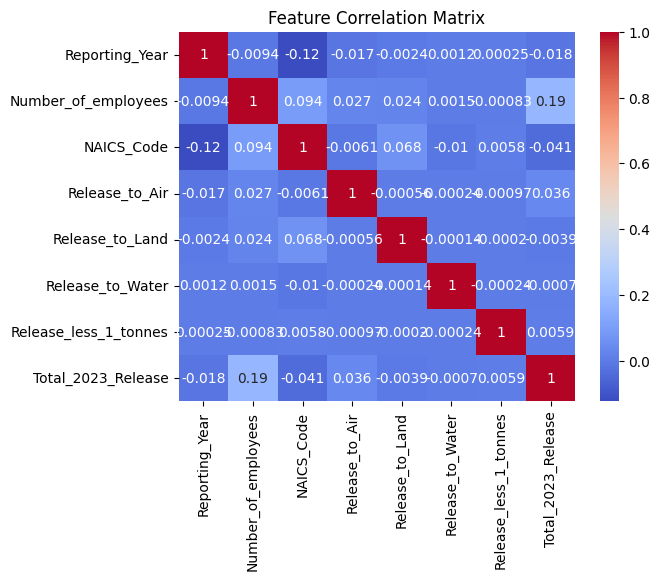

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Define the target variable (e.g., Total_Disposal) and features
target_variable = 'Total_Release'  # Replace with your actual target column
X = merged_data.drop(columns=[target_variable,'Company_Name', 'Facility_Name', 'NAICS_Title','Province','CAS_Number','Substance_Name_EN','Units','Estimation_Method'])
y = merged_data[target_variable]

# Ensure all columns in X are numeric
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Handle missing values (fill with column mean)
X_numeric.fillna(X_numeric.mean(), inplace=True)

# Correlation Analysis (on numeric features only)
correlation_matrix = X_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Feature Selection

- SelectKBest is a method for selecting the top k features based on a scoring function.
- Create a SelectKBest object: selector = SelectKBest(score_func=f_regression, k=5) creates an instance of SelectKBest.
- score_func=f_regression: Specifies the scoring function to use.
- f_regression is used for regression tasks, calculating the F-statistic(compares the variance between the means of different groups to the variance within each group.) between each feature and the target variable.
- k=5: Sets the number of top features to select (in this case, 5).
- Apply feature selection: X_selected = selector.
- fit_transform(X_numeric, y) applies the feature selection process.
fit_transform: Fits the selector to the data (X_numeric, y) and then transforms X_numeric to keep only the selected features.
- Get selected feature names: selected_features = X_numeric.columns[selector.get_support()] retrieves the names of the selected features.
- get_support(): Returns a boolean array indicating which features were selected.
- X_numeric.columns[...]: Uses the boolean array to select the corresponding feature names from X_numeric.columns.
- Print selected features: print("Selected Features (Univariate):", selected_features) prints the names of the selected features.

Selected Features (Univariate): Index(['Number_of_employees', 'Release_to_Air', 'Release_to_Land',
       'Release_to_Water', 'Total_2023_Release'],
      dtype='object')


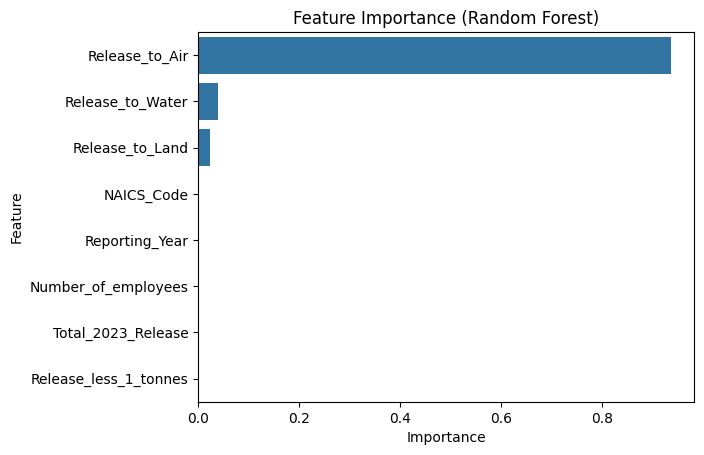

In [ ]:

#  Univariate Feature Selection
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_numeric, y)

# Get selected feature names
selected_features = X_numeric.columns[selector.get_support()]
print("Selected Features (Univariate):", selected_features)

# : Feature Importance from Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_numeric, y)

# Plot feature importances
importances = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': model.feature_importances_})
importances.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance (Random Forest)")
plt.show()


# Creating five different substance dataframes.

In [ ]:
# Group by 'Substance_Name_EN' and create separate DataFrames
substance_dataframes = {substance: df for substance, df in merged_data.groupby('Substance_Name_EN')}


<ipython-input-58-062d8a2ae16a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  substance_dataframes = {substance: df for substance, df in merged_data.groupby('Substance_Name_EN')}


After checking the count of each substance the top five are selected.

In [ ]:
# max 5 majority of substance
substance_counts = merged_data['Substance_Name_EN'].value_counts().head(5)
print(substance_counts)

Substance_Name_EN
PM2.5 - Particulate Matter <= 2.5 Micrometers      88737
PM10 - Particulate Matter <= 10 Micrometers        83436
Nitrogen oxides (expressed as nitrogen dioxide)    73435
Carbon monoxide                                    60469
Volatile Organic Compounds (VOCs)                  59162
Name: count, dtype: int64


In [ ]:
# Making 5 dataframe base on the 5 priority substance
PM25_df= substance_dataframes['PM2.5 - Particulate Matter <= 2.5 Micrometers'].copy()
PM10_df= substance_dataframes['PM10 - Particulate Matter <= 10 Micrometers'].copy()
VOCs_df= substance_dataframes['Volatile Organic Compounds (VOCs)'].copy()
NO2_df= substance_dataframes['Nitrogen oxides (expressed as nitrogen dioxide)'].copy()
CO2_df= substance_dataframes['Carbon monoxide'].copy()

In [ ]:
# Check PM25_df Units
print(PM25_df['Units'].value_counts())
print(PM10_df['Units'].value_counts())
print(VOCs_df['Units'].value_counts())
print(NO2_df['Units'].value_counts())
print(CO2_df['Units'].value_counts())

Units
tonnes    88737
g TEQ         0
grams         0
kg            0
Name: count, dtype: int64
Units
tonnes    83436
g TEQ         0
grams         0
kg            0
Name: count, dtype: int64
Units
tonnes    59162
g TEQ         0
grams         0
kg            0
Name: count, dtype: int64
Units
tonnes    73435
g TEQ         0
grams         0
kg            0
Name: count, dtype: int64
Units
tonnes    60469
g TEQ         0
grams         0
kg            0
Name: count, dtype: int64


# Visualizing the dataframes for each substance

Visualizing PM2.5...


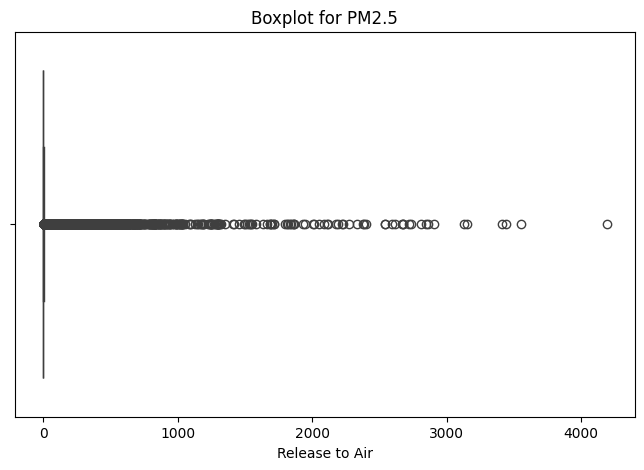

Visualizing PM10...


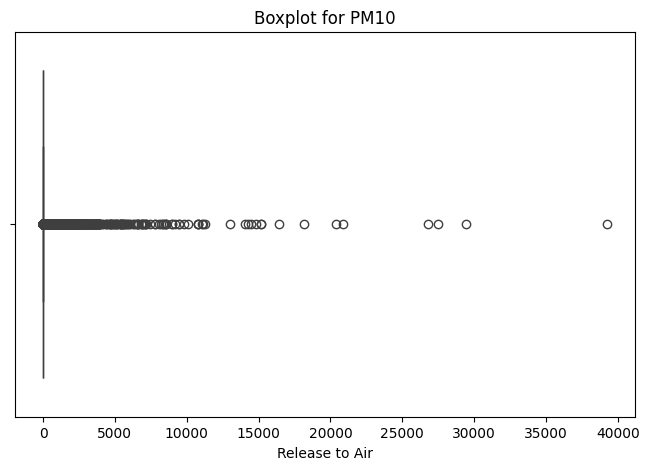

Visualizing VOCs...


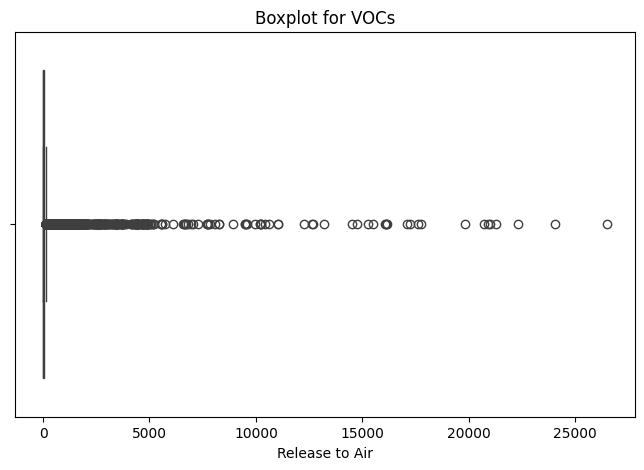

Visualizing NO2...


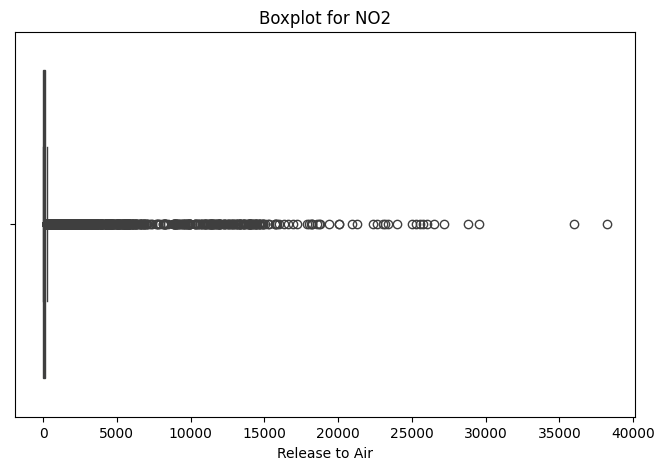

Visualizing CO2...


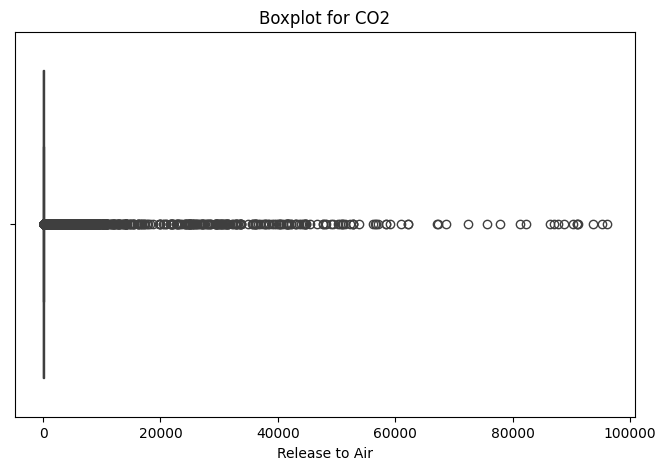

In [ ]:
# visual inspection plot distribution for each substance's release values
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary for easy access to substances and their data
substances = {
    "PM2.5": PM25_df,
    "PM10": PM10_df,
    "VOCs": VOCs_df,
    "NO2": NO2_df,
    "CO2": CO2_df
}

# Visualize each substance's release values
for substance_name, substance_data in substances.items():
    print(f"Visualizing {substance_name}...")

    # Check if the release column exists
    if 'Release_to_Air' not in substance_data.columns:
        print(f"'Release_to_Air' column not found for {substance_name}. Skipping...")
        continue

    # Boxplot for outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=substance_data['Release_to_Air'])
    plt.title(f"Boxplot for {substance_name}")
    plt.xlabel("Release to Air")
    plt.show()


# Winsorization
Winsorization caps outliers to a specified percentile range (e.g., 1st and 99th percentile). Keeps the values in the original scale while reducing the impact of extreme outliers.

In [ ]:
from scipy.stats import mstats
# Create copy of dictionary
# Apply Winsorization to clip extreme outliers
for substance_name, df in substances.items():
    print(f"Applying Winsorization to {substance_name}...")
    df['Release_to_Air'] = mstats.winsorize(df['Release_to_Air'], limits=[0.01, 0.01])  # Clipping top and bottom 1%


Applying Winsorization to PM2.5...
Applying Winsorization to PM10...
Applying Winsorization to VOCs...
Applying Winsorization to NO2...
Applying Winsorization to CO2...


In [ ]:
# Verify the changes by displaying summary statistics for each substance
for substance_name, df in substances.items():
    print(f"Summary statistics for {substance_name} after Winsorization:")
    print(df['Release_to_Air'].describe())
    print("\n")

Summary statistics for PM2.5 after Winsorization:
count    88737.000000
mean         9.592389
std         34.127275
min          0.001000
25%          0.405000
50%          0.923000
75%          3.173000
max        254.730000
Name: Release_to_Air, dtype: float64


Summary statistics for PM10 after Winsorization:
count    83436.000000
mean        21.874177
std         78.517910
min          0.001050
25%          0.655000
50%          1.700000
75%          7.427250
max        597.000000
Name: Release_to_Air, dtype: float64


Summary statistics for VOCs after Winsorization:
count    59162.000000
mean        61.577872
std        136.361230
min          0.000000
25%          2.353275
50%         15.091456
75%         49.571750
max        907.683000
Name: Release_to_Air, dtype: float64


Summary statistics for NO2 after Winsorization:
count    73435.000000
mean       148.789277
std        326.148608
min          0.140000
25%         25.800000
50%         52.081000
75%        126.698500
max  

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Visualizing PM2.5...


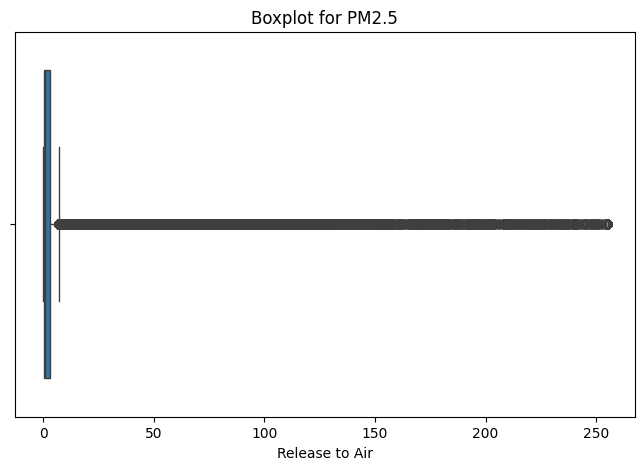

Visualizing PM10...


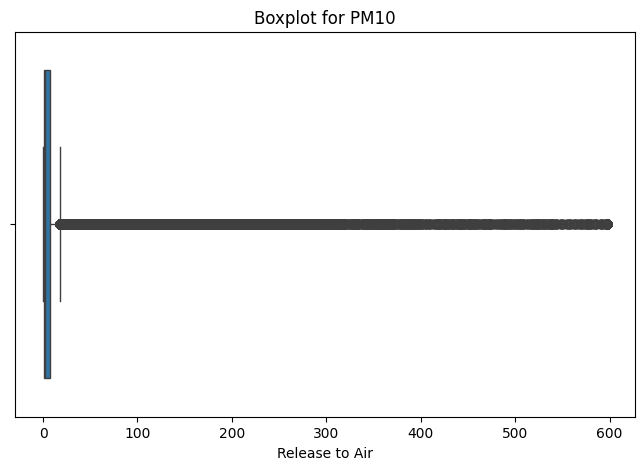

Visualizing VOCs...


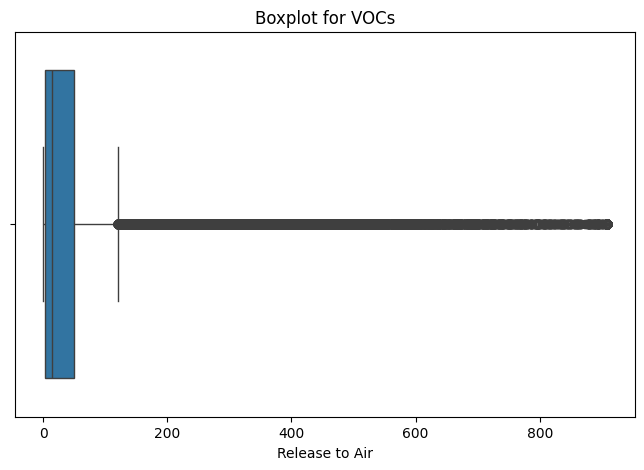

Visualizing NO2...


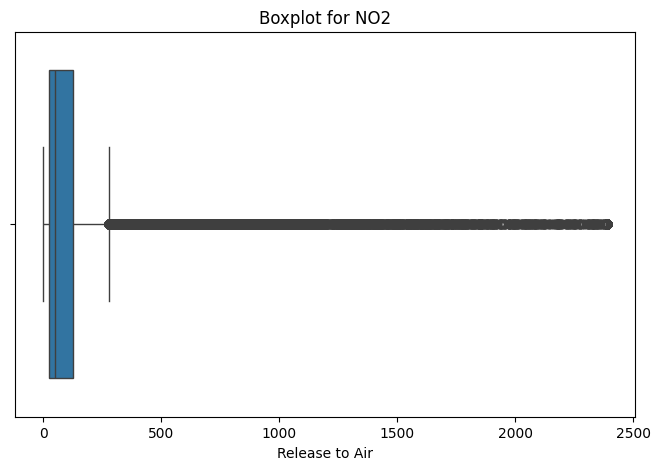

Visualizing CO2...


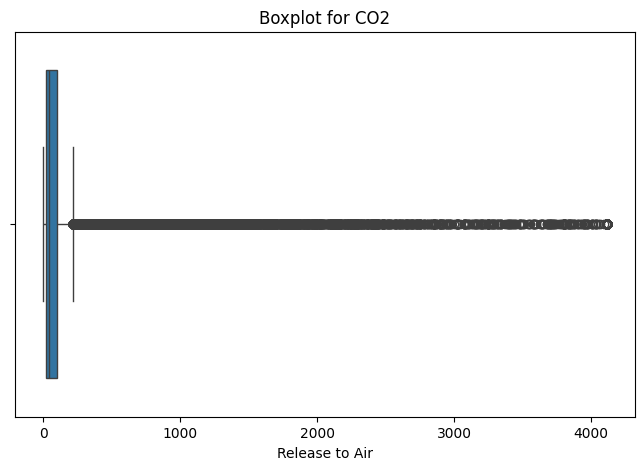

In [ ]:
# Visualize each substance's release values
for substance_name, substance_data in substances.items():
    print(f"Visualizing {substance_name}...")

    # Check if the release column exists
    if 'Release_to_Air' not in substance_data.columns:
        print(f"'Release_to_Air' column not found for {substance_name}. Skipping...")
        continue

    # Boxplot for outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=substance_data['Release_to_Air'])
    plt.title(f"Boxplot for {substance_name}")
    plt.xlabel("Release to Air")
    plt.show()

# Analyzing non-zero, zero, and missing values for substances

In [ ]:
import pandas as pd

# Function to analyze non-zero, zero, and missing values for substances
def analyze_substance_data(substances, features):
    analysis_results = []

    # Process each substance
    for substance_name, substance_data in substances.items():
        # Aggregate data by Province and Year
        substance_aggregated = substance_data.groupby(
            ['Province', 'Reporting_Year'], observed=False
        ).agg({
            feature: 'sum' for feature in features
        }).reset_index()

        # Analyze each feature
        for feature in features:
            total_rows = len(substance_aggregated)
            non_zero_count = substance_aggregated[feature].gt(0).sum()
            zero_count = substance_aggregated[feature].eq(0).sum()
            missing_count = substance_aggregated[feature].isnull().sum()

            # Append the results to the list
            analysis_results.append({
                "Substance": substance_name,
                "Feature": feature,
                "Total Rows": total_rows,
                "Non-Zero Values": non_zero_count,
                "Zero Values": zero_count,
                "Missing Values": missing_count
            })

    # Convert results to a DataFrame
    analysis_results_df = pd.DataFrame(analysis_results)

    # Pivot the data for better readability
    reshaped_results_df = analysis_results_df.pivot(index="Substance", columns="Feature", values=["Non-Zero Values", "Zero Values", "Missing Values"])
    reshaped_results_df.columns = ['_'.join(col).strip() for col in reshaped_results_df.columns.values]
    reshaped_results_df.reset_index(inplace=True)

    # Rename columns for clarity
    reshaped_results_df.rename(columns={
        'Substance': 'Substance',
        **{f'Non-Zero Values_{feature}': f'Non-Zero {feature}' for feature in features},
        **{f'Zero Values_{feature}': f'Zero {feature}' for feature in features},
        **{f'Missing Values_{feature}': f'Missing {feature}' for feature in features}
    }, inplace=True)

    return reshaped_results_df

# Define substances and features
top_substances = {
    "PM2.5": PM25_df,
    "PM10": PM10_df,
    "VOCs": VOCs_df,
    "NO2": NO2_df,
    "CO2": CO2_df
}

features_to_check = ['Release_to_Air', 'Release_to_Land', 'Release_to_Water','Total_2023_Release']

# Analyze the data
Missing_results_df = analyze_substance_data(top_substances, features_to_check)
print(Missing_results_df)


  Substance  Non-Zero Release_to_Air  Non-Zero Release_to_Land  \
0       CO2                      265                         0   
1       NO2                      271                         0   
2      PM10                      270                         0   
3     PM2.5                      271                         0   
4      VOCs                      245                         0   

   Non-Zero Release_to_Water  Non-Zero Total_2023_Release  \
0                          0                          214   
1                          0                          224   
2                          0                          228   
3                          0                          229   
4                          0                          212   

   Zero Release_to_Air  Zero Release_to_Land  Zero Release_to_Water  \
0                    0                   265                    265   
1                    0                   271                    271   
2                    0 

As there is no release to land and water for all the five substannces we go ahead with only air release.

# Feature Engineering and encoding



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}


Combining all the dataframes

In [ ]:
# Combine all DataFrames into a single DataFrame
all_substances_df = pd.concat([PM25_df, PM10_df, VOCs_df, NO2_df, CO2_df], ignore_index=True)

# Reset the index
all_substances_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print("Combined Dataset with All Substances:")
print(all_substances_df.head())

Combined Dataset with All Substances:
   Reporting_Year NPRI_ID  Number_of_employees  \
0            2002       1                  440   
1            2002       4                  450   
2            2002      11                   65   
3            2002      18                  170   
4            2002      21                   72   

                        Company_Name                      Facility_Name  \
0  ALBERTA PACIFIC FOREST INDUSTRIES  ALBERTA PACIFIC FOREST INDUSTRIES   
1                  TEMBEC INDUSTRIES              PINE FALLS OPERATIONS   
2       BORDEN CHEMICAL CANADA, INC.         BORDEN CHEMICAL - EDMONTON   
3                         ALCAN INC.                     Usine Saguenay   
4  BOLTON STEEL TUBE COMPANY LIMITED                       Bolton Plant   

   NAICS_Code                                        NAICS_Title Province  \
0      322112                                Chemical pulp mills       AB   
1      322122                                    Newspri

One-hot encoding does not introduce any ordinal relationship between the categories, making it suitable for nominal data where categories have no inherent order.
Improved Model Performance: One-hot encoding often leads to better model performance, especially with algorithms sensitive to ordinality or with large numbers of unique categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the Province column
label_encoder = LabelEncoder()
all_substances_df['Province'] = label_encoder.fit_transform(all_substances_df['Province'])

# To see the mapping between original province names and their numerical encoding
province_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Province Encoding Mapping:", province_mapping)

Province Encoding Mapping: {'AB': 0, 'BC': 1, 'MB': 2, 'NB': 3, 'NL': 4, 'NS': 5, 'NT': 6, 'NU': 7, 'ON': 8, 'PE': 9, 'QC': 10, 'SK': 11, 'YT': 12}


Creating lagged features: Lag features explicitly incorporate this temporal information into the dataset, allowing machine learning models to learn patterns and relationships that exist across different time steps. By including lag features, we provide the model with historical context that can help it make more accurate predictions.

We have alot of categories for company name and NAICS code so when we have a large number of categorical features with many unique categories, one-hot encoding can significantly increase the dimensionality of data. In such cases, label encoding might be preferred to save memory and computational resources.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


# Verify the structure of the combined DataFrame
required_columns = ['Substance_Name_EN', 'Province', 'Reporting_Year', 'Release_to_Air', 'NPRI_ID', 'Number_of_employees', 'Company_Name', 'NAICS_Code']
for column in required_columns:
    if column not in all_substances_df.columns:
        raise ValueError(f"Column '{column}' is missing in the DataFrame.")

# Encode categorical variables
label_encoders = {}
for col in ['Company_Name', 'NAICS_Code']:
    le = LabelEncoder()
    all_substances_df[col] = le.fit_transform(all_substances_df[col])
    label_encoders[col] = le

# Prepare aggregated dataset
all_results = {}

# Group by Substance and process each separately
for substance_name, substance_data in all_substances_df.groupby("Substance_Name_EN"):
    print(f"Processing substance: {substance_name}")

    # Aggregate data by Province and Year
    substance_aggregated = substance_data.groupby(['Province', 'Reporting_Year']).agg({
        'Release_to_Air': 'sum',
        'NPRI_ID': 'first',  # Use the first occurrence for simplicity
        'Number_of_employees': 'mean',  # Use average employees
        'Company_Name': 'first',  # Use the first occurrence
        'NAICS_Code': 'first'  # Use the first occurrence
    }).reset_index()

    # Prepare lagged features
    substance_aggregated['lag_1'] = substance_aggregated['Release_to_Air'].shift(1)
    substance_aggregated['lag_2'] = substance_aggregated['Release_to_Air'].shift(2)
    substance_aggregated = substance_aggregated.dropna()

    # Check for sufficient data
    if substance_aggregated.empty:
        print(f"No sufficient data for substance: {substance_name}. Skipping...")
        continue

    # Define features and target
    X = substance_aggregated[['lag_1', 'lag_2', 'Reporting_Year', 'Number_of_employees', 'Company_Name', 'NAICS_Code']]
    y = substance_aggregated['Release_to_Air']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }

    # Train and evaluate each model
    results = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        results[model_name] = evaluate_model(y_test, y_pred)

    # Store the results for the current substance
    all_results[substance_name] = pd.DataFrame(results).T

# Combine all results into one DataFrame
final_results_df = pd.concat(all_results, names=["Substance_Name_EN", "Model"])

# Display the results
print(final_results_df)



<ipython-input-70-b7ee5ccd462f>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for substance_name, substance_data in all_substances_df.groupby("Substance_Name_EN"):


Processing substance: 1,1,1,2-Tetrachloroethane
No sufficient data for substance: 1,1,1,2-Tetrachloroethane. Skipping...
Processing substance: 1,1,2,2-Tetrachloroethane
No sufficient data for substance: 1,1,2,2-Tetrachloroethane. Skipping...
Processing substance: 1,1,2-Trichloroethane
No sufficient data for substance: 1,1,2-Trichloroethane. Skipping...
Processing substance: 1,1-Methylenebis(4-isocyanatocyclohexane)
No sufficient data for substance: 1,1-Methylenebis(4-isocyanatocyclohexane). Skipping...
Processing substance: 1,2,4-Trichlorobenzene
No sufficient data for substance: 1,2,4-Trichlorobenzene. Skipping...
Processing substance: 1,2,4-Trimethylbenzene
No sufficient data for substance: 1,2,4-Trimethylbenzene. Skipping...
Processing substance: 1,2-Butylene oxide
No sufficient data for substance: 1,2-Butylene oxide. Skipping...
Processing substance: 1,2-Dichloroethane
No sufficient data for substance: 1,2-Dichloroethane. Skipping...
Processing substance: 1,2-Dichloropropane
No suf

# Hyperparameter grids for tuning

Hyperparameters significantly influence the performance of a machine learning model. Different hyperparameter values can lead to vastly different results in terms of accuracy, precision, recall, and other performance metrics.
Hyperparameter tuning aims to find the optimal combination of hyperparameter values that maximize the model's performance on a given dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# Hyperparameter grids for tuning
param_grids = {
    "Linear Regression": {},  # No hyperparameters for Linear Regression
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "n_estimators": [50, 100, 200],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
    },
}

In [ ]:
# Best models and results for each substance
best_results = {}
best_models = {}

for substance_name, substance_data in all_substances_df.groupby("Substance_Name_EN"):
    print(f"Processing substance: {substance_name}")

    # Aggregate and prepare data (as done previously)
    substance_aggregated = substance_data.groupby(['Province', 'Reporting_Year']).agg({
        'Release_to_Air': 'sum',
        'NPRI_ID': 'first',
        'Number_of_employees': 'mean',
        'Company_Name': 'first',
        'NAICS_Code': 'first'
    }).reset_index()

    substance_aggregated['lag_1'] = substance_aggregated['Release_to_Air'].shift(1)
    substance_aggregated['lag_2'] = substance_aggregated['Release_to_Air'].shift(2)
    substance_aggregated = substance_aggregated.dropna()

    if substance_aggregated.empty:
        print(f"No sufficient data for substance: {substance_name}. Skipping...")
        continue

    # Features and target
    X = substance_aggregated[['lag_1', 'lag_2', 'Reporting_Year', 'Number_of_employees', 'Company_Name', 'NAICS_Code']]
    y = substance_aggregated['Release_to_Air']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}
    for model_name, model in models.items():
        print(f"Tuning {model_name} for {substance_name}...")

        # Define and execute GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='r2',  # Or another suitable scoring metric
            cv=5,  # Number of cross-validation folds
            n_jobs=-1  # Use all available cores
        )
        grid_search.fit(X_train, y_train) # Fit the GridSearchCV object

        # Best model and metrics
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)

        results[model_name] = metrics

        # Store best model and metrics based on R^2
        if model_name not in best_models or metrics["R^2"] > best_models.get(model_name, {}).get("R^2", -np.inf):
            best_models[model_name] = {"model": best_model, "R^2": metrics["R^2"]} # Store model and R^2

    best_results[substance_name] = pd.DataFrame(results).T

# Combine results
final_tuned_results_df = pd.concat(best_results, names=["Substance_Name_EN", "Model"])

<ipython-input-72-00042c7ff432>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for substance_name, substance_data in all_substances_df.groupby("Substance_Name_EN"):


Processing substance: 1,1,1,2-Tetrachloroethane
No sufficient data for substance: 1,1,1,2-Tetrachloroethane. Skipping...
Processing substance: 1,1,2,2-Tetrachloroethane
No sufficient data for substance: 1,1,2,2-Tetrachloroethane. Skipping...
Processing substance: 1,1,2-Trichloroethane
No sufficient data for substance: 1,1,2-Trichloroethane. Skipping...
Processing substance: 1,1-Methylenebis(4-isocyanatocyclohexane)
No sufficient data for substance: 1,1-Methylenebis(4-isocyanatocyclohexane). Skipping...
Processing substance: 1,2,4-Trichlorobenzene
No sufficient data for substance: 1,2,4-Trichlorobenzene. Skipping...
Processing substance: 1,2,4-Trimethylbenzene
No sufficient data for substance: 1,2,4-Trimethylbenzene. Skipping...
Processing substance: 1,2-Butylene oxide
No sufficient data for substance: 1,2-Butylene oxide. Skipping...
Processing substance: 1,2-Dichloroethane
No sufficient data for substance: 1,2-Dichloroethane. Skipping...
Processing substance: 1,2-Dichloropropane
No suf

In [ ]:
final_tuned_results_df

MAE  \
Substance_Name_EN                               Model                            
Carbon monoxide                                 Linear Regression  7171.870702   
                                                Decision Tree      5874.166428   
                                                Random Forest      6802.404572   
                                                XGBoost            6939.964220   
                                                KNN                6751.529437   
Nitrogen oxides (expressed as nitrogen dioxide) Linear Regression  6199.206385   
                                                Decision Tree      8994.592242   
                                                Random Forest      6584.918469   
                                                XGBoost            5838.444813   
                                                KNN                7449.509895   
PM10 - Particulate Matter <= 10 Micrometers     Linear Regression  1395.624717   
                                                Decision Tree      1561.526335   
                                                Random Forest      1108.318426   
                                                XGBoost            1200.100211   
                                                KNN                1147.568956   
PM2.5 - Particulate Matter <= 2.5 Micrometers   Linear Regression   484.185627   
                                                Decision Tree       364.446699   
                                                Random Forest       406.477212   
                                                XGBoost             308.685620   
                                                KNN                 438.094305   
Volatile Organic Compounds (VOCs)               Linear Regression  3898.746376   
                                                Decision Tree      4051.772165   
                                                Random Forest      3653.460896   
                                                XGBoost            3898.202893   
                                                KNN                4785.792157   

                                                                            MSE  \
Substance_Name_EN                               Model                             
Carbon monoxide                                 Linear Regression  3.022092e+08   
                                                Decision Tree      2.042387e+08   
                                                Random Forest      1.990012e+08   
                                                XGBoost            2.564992e+08   
                                                KNN                2.996893e+08   
Nitrogen oxides (expressed as nitrogen dioxide) Linear Regression  6.843048e+08   
                                                Decision Tree      1.699972e+09   
                                                Random Forest      8.565824e+08   
                                                XGBoost            4.493554e+08   
                                                KNN                7.882313e+08   
PM10 - Particulate Matter <= 10 Micrometers     Linear Regression  7.188311e+06   
                                                Decision Tree      1.164284e+07   
                                                Random Forest      3.881530e+06   
                                                XGBoost            4.998426e+06   
                                                KNN                5.254501e+06   
PM2.5 - Particulate Matter <= 2.5 Micrometers   Linear Regression  5.891412e+05   
                                                Decision Tree      4.427149e+05   
                                                Random Forest      5.585032e+05   
                                                XGBoost            2.634944e+05   
                                                KNN                1.032175e+06   
Volatile Organic Compounds (VOCs) 

In [ ]:
# Store best models for future use
print("Best models for each substance:")
for substance, model in best_models.items():
    print(f"{substance}: {model}")

Best models for each substance:
Linear Regression: {'model': LinearRegression(), 'R^2': 0.9500335422644375}
Decision Tree: {'model': DecisionTreeRegressor(min_samples_split=10, random_state=42), 'R^2': 0.9624523043827303}
Random Forest: {'model': RandomForestRegressor(random_state=42), 'R^2': 0.952632027220007}
XGBoost: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n

# Prediction using XGBoost

As XG boost is the best model for most of the substances we use that model.

XGBoost is a powerful gradient boosting algorithm known for its high performance and accuracy. It often outperforms other machine learning models in regression tasks, making it suitable for this scenario. Lag features are included in the model to capture the temporal dependencies in the data. By including past values of 'Release_to_Air', the model can learn patterns and trends over time, improving its ability to make future predictions.

**Prediction Process**

The code prepares for future predictions by retrieving the last two lag values and other features. It's set up to iterate over future years and likely uses these values along with the trained model to make predictions. However, the code snippet provided seems to be incomplete, as it doesn't contain the actual prediction loop for future years. This loop would typically involve updating the lag features iteratively based on the previous year's prediction and using the model to predict the next year's value.


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Define future years for prediction
future_years = range(2023, 2028)  # Predict for 2023 to 2027

# Dictionary to store predictions for all substances using XGBoost
future_predictions_all_xgb = {}  # Initialize as a dictionary

for substance_name, substance_data in substances.items():  # Iterate over substances
    future_predictions_xgb = []
    for (province, company_name), province_company_data in substance_data.groupby(['Province', 'Company_Name']):
        # Calculate lag features for each province-company combination
        province_company_data['lag_1'] = province_company_data['Release_to_Air'].shift(1)
        province_company_data['lag_2'] = province_company_data['Release_to_Air'].shift(2)
        province_company_data = province_company_data.dropna()  # Drop rows with NaN due to lag calculation

        if province_company_data.empty:  # Check if DataFrame is empty after dropping NaNs
            print(f"No sufficient data for {substance_name} in {province}, {company_name}. Skipping...")
            continue

        # Features and target
        X_xgb = province_company_data[['lag_1', 'lag_2', 'Reporting_Year', 'Number_of_employees']]  # Include all relevant features
        y_xgb = province_company_data['Release_to_Air']

        # Train XGBoost Regressor model
        model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
        model_xgb.fit(X_xgb, y_xgb)

        # Get the last two lag values and other features for prediction
        last_row_xgb = province_company_data.tail(1)
        last_lags_xgb = last_row_xgb[['lag_1', 'lag_2']].values
        reporting_year_xgb = last_row_xgb['Reporting_Year'].values[0]
        num_employees_xgb = last_row_xgb['Number_of_employees'].values[0]

        # Predict for future years
        predictions_xgb = []
        for year in future_years:
            # Create prediction input with all features
            prediction_input_xgb = [[last_lags_xgb[0][0], last_lags_xgb[0][1], year, num_employees_xgb]]

            predicted_value_xgb = model_xgb.predict(prediction_input_xgb)[0]
            predictions_xgb.append({
                'Year': year,
                'Province': province,
                'Substance': substance_name,
                'Company_Name': company_name,
                'Number_of_employees': num_employees_xgb,
                'Predicted_Release_to_Air': predicted_value_xgb
            })

            # Update lags for next year's prediction
            last_lags_xgb = [[predicted_value_xgb, last_lags_xgb[0][0]]]

        future_predictions_xgb.extend(predictions_xgb)  # Extend with new predictions

    # Store predictions for the current substance in the dictionary
    future_predictions_all_xgb[substance_name] = pd.DataFrame(future_predictions_xgb)

# Combine predictions into one DataFrame
combined_predictions_xgb = pd.concat(future_predictions_all_xgb.values()).reset_index(drop=True)

# Display the combined predictions
print(combined_predictions_xgb)


Streaming output truncated to the last 5000 lines.
No sufficient data for NO2 in ON, City of Kingston. Skipping...
No sufficient data for NO2 in ON, City of Ottawa, Environmental Services Department. Skipping...
No sufficient data for NO2 in ON, City of Peterborough. Skipping...
No sufficient data for NO2 in ON, City of Sarnia. Skipping...
No sufficient data for NO2 in ON, Clean Harbors Canada, Inc. [principal]. Skipping...
No sufficient data for NO2 in ON, Cochrane Power Corp.. Skipping...
No sufficient data for NO2 in ON, Columbia Forest Products Ltd.. Skipping...
No sufficient data for NO2 in ON, Columbian Chemicals Canada Ltd.. Skipping...
No sufficient data for NO2 in ON, Corporation of the City of Cornwall. Skipping...
No sufficient data for NO2 in ON, Crown Cork & Seal Canada. Skipping...
No sufficient data for NO2 in ON, Cyclone Manufacturing Inc.. Skipping...
No sufficient data for NO2 in ON, DAIMLERCHRYSLER. Skipping...
No sufficient data for NO2 in ON, DAIMLERCHRYSLER CANADA

# Comparing with the data in year 2023 - Release to Air
- Encoding using LabelEncoder for Substance_Encoded

We have the predictions for the release to air for the companies with sufficient data for next five years.

In [ ]:
print(combined_predictions_xgb.head(30))

    Year Province Substance                                 Company_Name  \
0   2023       AB     PM2.5                     ACCEL Energy Canada Ltd.   
1   2024       AB     PM2.5                     ACCEL Energy Canada Ltd.   
2   2025       AB     PM2.5                     ACCEL Energy Canada Ltd.   
3   2026       AB     PM2.5                     ACCEL Energy Canada Ltd.   
4   2027       AB     PM2.5                     ACCEL Energy Canada Ltd.   
5   2023       AB     PM2.5                  ADM Agri-Industries Company   
6   2024       AB     PM2.5                  ADM Agri-Industries Company   
7   2025       AB     PM2.5                  ADM Agri-Industries Company   
8   2026       AB     PM2.5                  ADM Agri-Industries Company   
9   2027       AB     PM2.5                  ADM Agri-Industries Company   
10  2023       AB     PM2.5                 AECO Gas Storage Partnership   
11  2024       AB     PM2.5                 AECO Gas Storage Partnership   
12  2025    

Combining all the dataframes in the dictionarty to one dataframe


In [ ]:
import pandas as pd

# Assuming substance_dataframes is your dictionary
all_data = pd.concat(substance_dataframes.values(), ignore_index=True)

# Add a 'Substance' column based on the dictionary keys
all_data['Substance'] = pd.Series(all_data.index).map({i: substance for substance, df in substance_dataframes.items() for i in range(len(df))}).values

# Convert 'Reporting_Year' to numeric
all_data['Reporting_Year'] = pd.to_numeric(all_data['Reporting_Year'], errors='coerce')

print(all_data.head(5))

   Reporting_Year NPRI_ID  Number_of_employees  \
0            2008    5910                  140   
1            2000     280                 1695   
2            2001     280                 1568   
3            2001    7038                   17   
4            2002     280                 1568   

                       Company_Name              Facility_Name  NAICS_Code  \
0           WABI IRON & STEEL CORP.    WABI IRON & STEEL CORP.      331511   
1  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   
2  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   
3                 CCI Newmarket Ltd          CCI Newmarket Ltd      221119   
4  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   

                       NAICS_Title Province CAS_Number  \
0                   Iron foundries       ON   630-20-6   
1      Petrochemical manufacturing       AB    79-34-5   
2      Petrochemical manufacturing       AB    79-34-5  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Substance' column
combined_predictions_xgb['Substance_Encoded'] = label_encoder.fit_transform(combined_predictions_xgb['Substance'])

# Display the mapping of substances to encoded values
substance_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Substance Encoding Mapping:", substance_mapping)

# Display the updated DataFrame with the encoded 'Substance' column
print(combined_predictions_xgb.head())


Substance Encoding Mapping: {'CO2': 0, 'NO2': 1, 'PM10': 2, 'PM2.5': 3, 'VOCs': 4}
   Year Province Substance              Company_Name  Number_of_employees  \
0  2023       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
1  2024       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
2  2025       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
3  2026       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
4  2027       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   

   Predicted_Release_to_Air  Substance_Encoded  
0                  2.116039                  3  
1                  2.116039                  3  
2                  2.116039                  3  
3                  2.116039                  3  
4                  2.116039                  3  


In [ ]:
# Filter the dataframe for the year 2023
predictions_2023 = combined_predictions_xgb[combined_predictions_xgb['Year'] == 2023]

# Display the resulting dataframe
print("Predictions for the year 2023:")
print(predictions_2023.head())


Predictions for the year 2023:
    Year Province Substance                                 Company_Name  \
0   2023       AB     PM2.5                     ACCEL Energy Canada Ltd.   
5   2023       AB     PM2.5                  ADM Agri-Industries Company   
10  2023       AB     PM2.5                 AECO Gas Storage Partnership   
15  2023       AB     PM2.5  ALIMENT JBS CANADA ULC/ JBS FOOD CANADA ULC   
20  2023       AB     PM2.5                           ARC RESOURCES LTD.   

    Number_of_employees  Predicted_Release_to_Air  Substance_Encoded  
0                    18                  2.116039                  3  
5                    20                  0.432932                  3  
10                   24                  0.557612                  3  
15                 2528                  5.456459                  3  
20                    1                  6.355897                  3  


In [ ]:
import pandas as pd

# Combine all 5 dataframes into one, adding a 'Substance' column
combined_substances_df = pd.concat([df.assign(Substance=substance)
                                     for substance, df in substance_dataframes.items()],
                                    ignore_index=True)
# Display the combined dataframe
print("Combined Substances DataFrame:")
print(combined_substances_df.head())

# Check the shape to confirm the combination
print("Shape of the Combined DataFrame:", combined_substances_df.shape)


Combined Substances DataFrame:
   Reporting_Year NPRI_ID  Number_of_employees  \
0            2008    5910                  140   
1            2000     280                 1695   
2            2001     280                 1568   
3            2001    7038                   17   
4            2002     280                 1568   

                       Company_Name              Facility_Name  NAICS_Code  \
0           WABI IRON & STEEL CORP.    WABI IRON & STEEL CORP.      331511   
1  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   
2  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   
3                 CCI Newmarket Ltd          CCI Newmarket Ltd      221119   
4  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   

                       NAICS_Title Province CAS_Number  \
0                   Iron foundries       ON   630-20-6   
1      Petrochemical manufacturing       AB    79-34-5   
2      Petrochemical manu

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Substance' column in the combined substances dataframe
combined_substances_df['Substance_Encoded'] = label_encoder.fit_transform(combined_substances_df['Substance_Name_EN'])

# Display the mapping of substances to encoded values
substance_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Substance Encoding Mapping:", substance_mapping)

# Display the updated combined dataframe
print("Encoded Combined Substances DataFrame:")
print(combined_substances_df.head())

Substance Encoding Mapping: {'1,1,1,2-Tetrachloroethane': 0, '1,1,2,2-Tetrachloroethane': 1, '1,1,2-Trichloroethane': 2, '1,1-Methylenebis(4-isocyanatocyclohexane)': 3, '1,2,4-Trichlorobenzene': 4, '1,2,4-Trimethylbenzene': 5, '1,2-Butylene oxide': 6, '1,2-Dichloroethane': 7, '1,2-Dichloropropane': 8, '1,3-Butadiene': 9, "1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives": 10, '1,4-Dioxane': 11, '1-Nitropyrene': 12, '2,2,4-Trimethylhexamethylene diisocyanate': 13, '2,4-Dichlorophenol (and its salts)': 14, '2,4-Dinitrotoluene': 15, '2,6-Di-t-butyl-4-methylphenol': 16, '2-(2-Methoxyethoxy)ethanol': 17, '2-Butoxyethanol': 18, '2-Ethoxyethanol': 19, '2-Ethoxyethyl acetate': 20, '2-Mercaptobenzothiazole': 21, '2-Methoxyethanol': 22, '2-Propanone, reaction products with diphenylamine': 23, "3,3'-Dichlorobenzidine dihydrochloride": 24, '3-Methylcholanthrene': 25, '4-tert-Octylphenol': 26, '5-Methylchrysene': 27, '7,12-Dimethylbenz[a]anthracene': 28, '7H-Dibenzo[c,g]carbazole': 29, '

In [ ]:
# Display the updated DataFrame with the encoded 'Substance' column
print(predictions_2023.head(3))
print(combined_substances_df.head(3))

    Year Province Substance                  Company_Name  \
0   2023       AB     PM2.5      ACCEL Energy Canada Ltd.   
5   2023       AB     PM2.5   ADM Agri-Industries Company   
10  2023       AB     PM2.5  AECO Gas Storage Partnership   

    Number_of_employees  Predicted_Release_to_Air  Substance_Encoded  
0                    18                  2.116039                  3  
5                    20                  0.432932                  3  
10                   24                  0.557612                  3  
   Reporting_Year NPRI_ID  Number_of_employees  \
0            2008    5910                  140   
1            2000     280                 1695   
2            2001     280                 1568   

                       Company_Name              Facility_Name  NAICS_Code  \
0           WABI IRON & STEEL CORP.    WABI IRON & STEEL CORP.      331511   
1  DOW CHEMICAL CANADA INCORPORATED  Western Canada Operations      325110   
2  DOW CHEMICAL CANADA INCORPORATED 

# Merging datasets


The datasets that contains predictions for the next five years and the dataframe with release from 2023 are merged to compare.

In [ ]:
# uniques columns of sustance solumn in prediction dataframe
unique_columns = predictions_2023['Substance'].unique()
print(unique_columns)

['PM2.5' 'PM10' 'VOCs' 'NO2' 'CO2']


In [ ]:
substance_mapping = {'PM2.5': 'PM2.5 - Particulate Matter <= 2.5 Micrometers', 'PM10': 'PM10 - Particulate Matter <= 10 Micrometers', 'VOCs': 'Volatile Organic Compounds (VOCs)','NO2':'Nitrogen oxides (expressed as nitrogen dioxide)', 'CO2':'Carbon monoxide'}

# Apply the mapping using map()
predictions_2023['Substance'] = predictions_2023['Substance'].map(substance_mapping)

<ipython-input-84-775d5193b944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_2023['Substance'] = predictions_2023['Substance'].map(substance_mapping)


In [ ]:
# Merge the datasets on common columns
merged_comparison = pd.merge(
    predictions_2023,
    combined_substances_df,
    on=['Province', 'Company_Name', 'Substance'],
    how='inner',  # Use 'inner' to keep only matching rows
    suffixes=('_pred', '_actual')
)

# Display the merged dataset
print("Merged Dataset for Comparison:")
print(merged_comparison.head())


Merged Dataset for Comparison:
   Year Province                                      Substance  \
0  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
1  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
2  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
3  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
4  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   

                  Company_Name  Number_of_employees_pred  \
0     ACCEL Energy Canada Ltd.                        18   
1     ACCEL Energy Canada Ltd.                        18   
2     ACCEL Energy Canada Ltd.                        18   
3     ACCEL Energy Canada Ltd.                        18   
4  ADM Agri-Industries Company                        20   

   Predicted_Release_to_Air  Substance_Encoded_pred  Reporting_Year NPRI_ID  \
0                  2.116039                       3            2020    4566   
1                  2.116039                    

Comparison is made and the predictions are evaluated by seeing the absolute error.

In [ ]:
# Filter rows with available actual and predicted data for comparison
comparison_df = merged_comparison[
    merged_comparison['Total_2023_Release'].notnull() &
    merged_comparison['Predicted_Release_to_Air'].notnull()
]

# Select relevant columns, using updated column names after merge
comparison_df = comparison_df[[
    'Year', 'Province', 'Substance_Name_EN', 'Company_Name',
    'Predicted_Release_to_Air', 'Total_2023_Release'
]]

# Rename columns for clarity
comparison_df.rename(columns={
    'Reporting_Year_pred': 'Year',
    'Substance_Name_EN': 'Substance', # Rename 'Substance_Name_EN' to 'Substance'
    'Predicted_Release_to_Air': 'Predicted',
    'Total_2023_Release': 'Actual'
}, inplace=True)

# Calculate errors
comparison_df['Absolute_Error'] = abs(comparison_df['Predicted'] - comparison_df['Actual'])
comparison_df['Percentage_Error'] = (
    comparison_df['Absolute_Error'] / comparison_df['Actual']
) * 100

# Display the comparison
print("Comparison of Predictions vs Actuals:")
print(comparison_df.head(30))

Comparison of Predictions vs Actuals:
    Year Province                                      Substance  \
0   2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
3   2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
4   2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
7   2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
10  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
11  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
12  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
14  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
15  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
16  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
18  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
20  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
21  2023       AB  PM2.5 - Particulate Matter <= 2.5 Micrometers   
22  2023  

# Prediction for the total next 5 year

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Define future years for prediction
future_years = range(2023, 2028)  # Predict for 2023 to 2027

# Dictionary to store predictions for all substances
future_predictions_all_xgb = {}

# Predict releases per province for each substance
for substance_name, substance_data in substances.items():  # Iterate over substances
    future_predictions_xgb = []
    for (province, company_name), province_company_data in substance_data.groupby(['Province', 'Company_Name']):
        # Calculate lag features for each province-company combination
        province_company_data['lag_1'] = province_company_data['Release_to_Air'].shift(1)
        province_company_data['lag_2'] = province_company_data['Release_to_Air'].shift(2)
        province_company_data = province_company_data.dropna()  # Drop rows with NaN due to lag calculation

        if province_company_data.empty:  # Check if DataFrame is empty after dropping NaNs
            print(f"No sufficient data for {substance_name} in {province}, {company_name}. Skipping...")
            continue

        # Features and target
        X = province_company_data[['lag_1', 'lag_2', 'Reporting_Year', 'Number_of_employees']]
        y = province_company_data['Release_to_Air']

        # Train XGBoost Regressor model
        model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
        model_xgb.fit(X, y)

        # Get the last two lag values and other features for prediction
        last_row = province_company_data.tail(1)
        last_lags = last_row[['lag_1', 'lag_2']].values
        reporting_year = last_row['Reporting_Year'].values[0]
        num_employees = last_row['Number_of_employees'].values[0]

        # Predict for future years
        predictions_xgb = []
        for year in future_years:
            # Create prediction input with all features
            prediction_input = [[last_lags[0][0], last_lags[0][1], year, num_employees]]

            predicted_value = model_xgb.predict(prediction_input)[0]
            predictions_xgb.append({
                'Year': year,
                'Province': province,
                'Substance': substance_name,
                'Company_Name': company_name,
                'Number_of_employees': num_employees,
                'Predicted_Release_to_Air': predicted_value
            })

            # Update lags for next year's prediction
            last_lags = [[predicted_value, last_lags[0][0]]]

        future_predictions_xgb.extend(predictions_xgb)  # Add predictions for this province to the substance list

    # Store predictions for the current substance
    future_predictions_all_xgb[substance_name] = pd.DataFrame(future_predictions_xgb)

# Combine predictions into one DataFrame
combined_predictions_xgb = pd.concat(future_predictions_all_xgb.values()).reset_index(drop=True)

# Aggregate predictions by Province and Year
total_predictions_xgb = combined_predictions_xgb.groupby(['Province', 'Year']).agg({
    'Predicted_Release_to_Air': 'sum'
}).reset_index()

print(total_predictions_xgb)


Streaming output truncated to the last 5000 lines.
No sufficient data for NO2 in ON, Canadian Tire Corporation. Skipping...
No sufficient data for NO2 in ON, Capital Paving Inc.. Skipping...
No sufficient data for NO2 in ON, Cardinal Power of Canada, L.P.. Skipping...
No sufficient data for NO2 in ON, Carmeuse Lime Canada. Skipping...
No sufficient data for NO2 in ON, Carmeuse Lime Canada Limited. Skipping...
No sufficient data for NO2 in ON, Carpenter Canada Co.. Skipping...
No sufficient data for NO2 in ON, Cascades Canada ULC.. Skipping...
No sufficient data for NO2 in ON, CertainTeed Canada, Inc.. Skipping...
No sufficient data for NO2 in ON, CertainTeed Gypsum Canada, Inc.. Skipping...
No sufficient data for NO2 in ON, Certainteed Corp Insulation Group. Skipping...
No sufficient data for NO2 in ON, Chemtura Canada Co. Cie.. Skipping...
No sufficient data for NO2 in ON, Chrysler Canada Inc.. Skipping...
No sufficient data for NO2 in ON, City of Hamilton. Skipping...
No sufficient d

# Calculate decreases for each province


Province with the largest decrease:
Year Province         2023           2024         2025          2026  \
0          AB  125943.5625  117034.054688  124591.8125  119648.65625   

Year           2027     Decrease  
0     122757.398438  3186.164062  


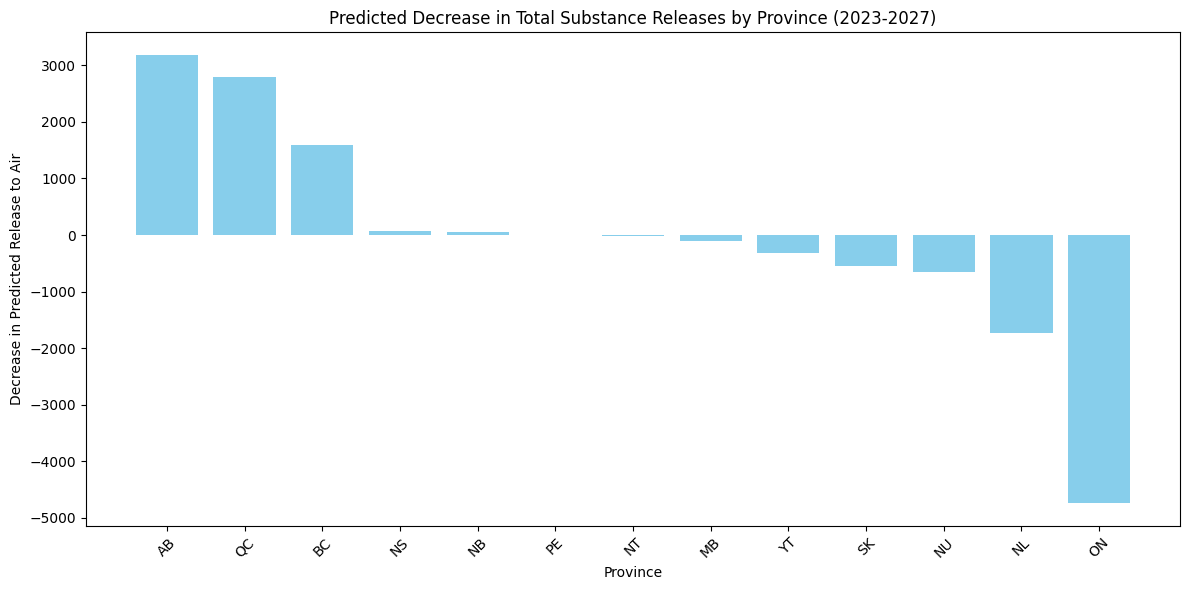

In [ ]:
# Calculate decreases for each province
decrease_analysis = total_predictions_xgb.pivot(index='Province', columns='Year', values='Predicted_Release_to_Air')
decrease_analysis['Decrease'] = decrease_analysis[2023] - decrease_analysis[2027]

# Sort by largest decrease
decrease_analysis = decrease_analysis.sort_values(by='Decrease', ascending=False).reset_index()

# Display the province with the largest decrease
largest_decrease_province = decrease_analysis.head(1)
print("\nProvince with the largest decrease:")
print(largest_decrease_province)

# Visualization
import matplotlib.pyplot as plt

# Bar chart for decreases
plt.figure(figsize=(12, 6))
plt.bar(decrease_analysis['Province'], decrease_analysis['Decrease'], color='skyblue')
plt.title("Predicted Decrease in Total Substance Releases by Province (2023-2027)")
plt.xlabel("Province")
plt.ylabel("Decrease in Predicted Release to Air")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total predicted release per province and year
total_predictions = combined_predictions_xgb.groupby(['Province', 'Year', 'Substance']).agg({
    'Predicted_Release_to_Air': 'sum'
}).reset_index()

# Analyze decreases for each substance
decrease_analysis_per_substance = {}
for substance_name in total_predictions['Substance'].unique():
    substance_predictions = total_predictions[total_predictions['Substance'] == substance_name]

    # Pivot to calculate decreases
    pivoted = substance_predictions.pivot(index='Province', columns='Year', values='Predicted_Release_to_Air')
    pivoted['Decrease'] = pivoted[2023] - pivoted[2027]
    pivoted = pivoted.reset_index()

    # Store the analysis for the substance
    decrease_analysis_per_substance[substance_name] = pivoted[['Province', 'Decrease']].sort_values(by='Decrease', ascending=False)


In [ ]:
# Assuming each DataFrame in decrease_analysis_per_substance has 'Province', 'Year', and 'Decrease'
merged_decrease_analysis = None

# Iteratively merge each substance's decrease analysis
for substance, df in decrease_analysis_per_substance.items():
    df = df.rename(columns={"Decrease": f"{substance}_Decrease"})  # Rename Decrease column for clarity
    if merged_decrease_analysis is None:
        merged_decrease_analysis = df
    else:
        # Merge only on 'Province' since 'Year' is not present in individual DataFrames
        merged_decrease_analysis = merged_decrease_analysis.merge(
            df, on=['Province'], how='outer'
        )

# Ensure all missing values are handled (optional)
merged_decrease_analysis = merged_decrease_analysis.fillna(0)

# Display the final merged DataFrame
print(merged_decrease_analysis)

Year Province  CO2_Decrease  NO2_Decrease  PM10_Decrease  PM2.5_Decrease  \
0          AB   3614.285156   -892.476562     -78.229492      -47.487793   
1          BC   2440.673828    462.308594    -678.914551     -271.191895   
2          MB     24.214355     -8.327637      -0.552185        1.416290   
3          NB    173.103516     25.818359    -121.888916      -32.191833   
4          NL   -120.678223   -945.448242     -44.356201     -119.965149   
5          NS      1.716309   -203.788208      66.911011       86.792084   
6          NT      4.971558     82.572754       0.694458        0.032135   
7          NU    -67.367920   -141.594971    -418.790100      -18.054260   
8          ON  -1668.679688  -2122.791016    -512.878418     -261.663818   
9          PE      0.000000      0.000000      -0.000658        0.000000   
10         QC   3237.078125    733.179688    -475.836426     -130.451416   
11         SK     37.752930   -492.087891    -108.544189       -2.547119   
12         Y

# Visualization

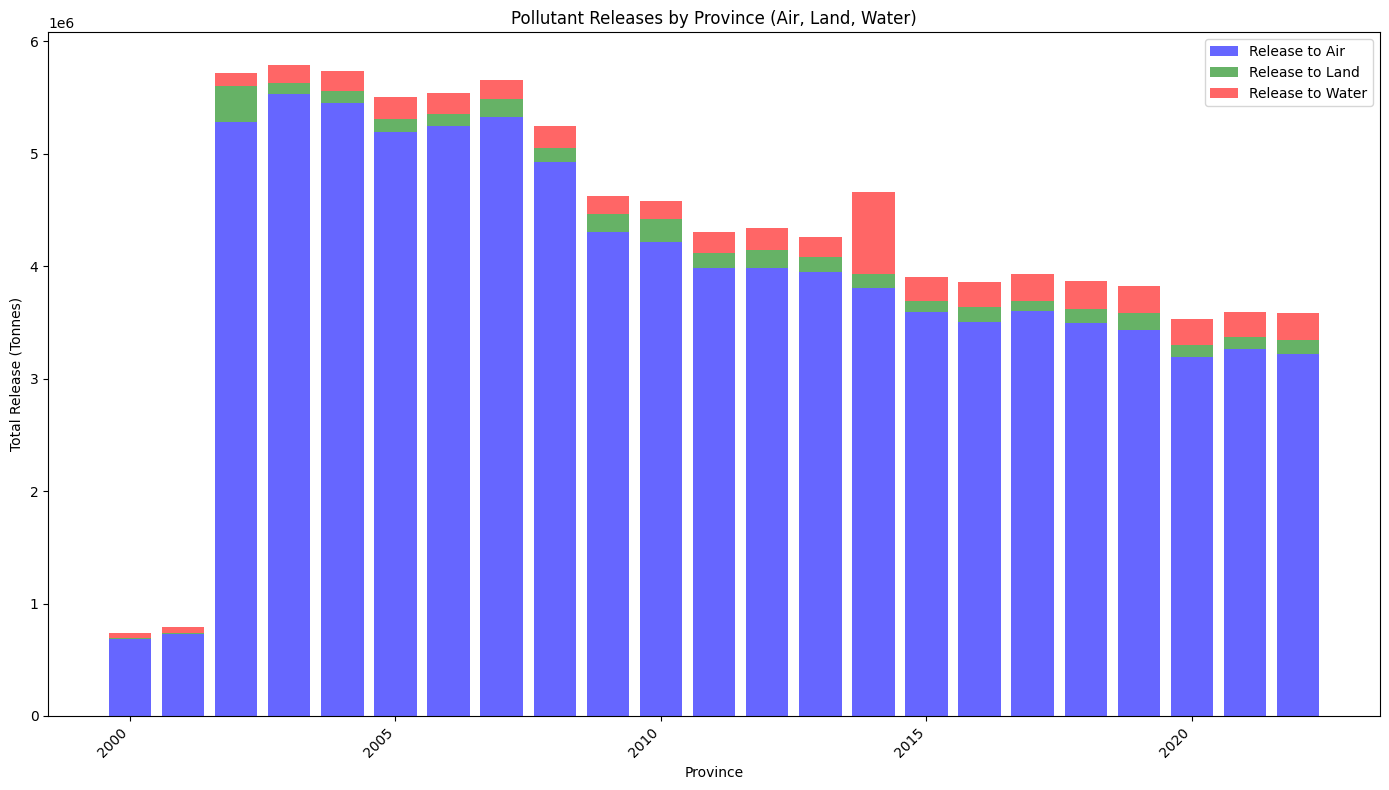

In [ ]:
import matplotlib.pyplot as plt

# Group data by province and sum the release types
province_release_summary = df_Release_2000_2022.groupby('Reporting_Year')[['Release_to_Air', 'Release_to_Land', 'Release_to_Water']].sum()

# Create a bar plot for each release type
plt.figure(figsize=(14, 8))

# Plot the trends for Air, Land, and Water for each province
plt.bar(province_release_summary.index, province_release_summary['Release_to_Air'], label='Release to Air', color='blue', alpha=0.6)
plt.bar(province_release_summary.index, province_release_summary['Release_to_Land'], label='Release to Land', color='green', alpha=0.6, bottom=province_release_summary['Release_to_Air'])
plt.bar(province_release_summary.index, province_release_summary['Release_to_Water'], label='Release to Water', color='red', alpha=0.6, bottom=province_release_summary['Release_to_Air'] + province_release_summary['Release_to_Land'])

# Add labels, title, and legend
plt.title('Pollutant Releases by Province (Air, Land, Water)')
plt.xlabel('Province')
plt.ylabel('Total Release (Tonnes)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


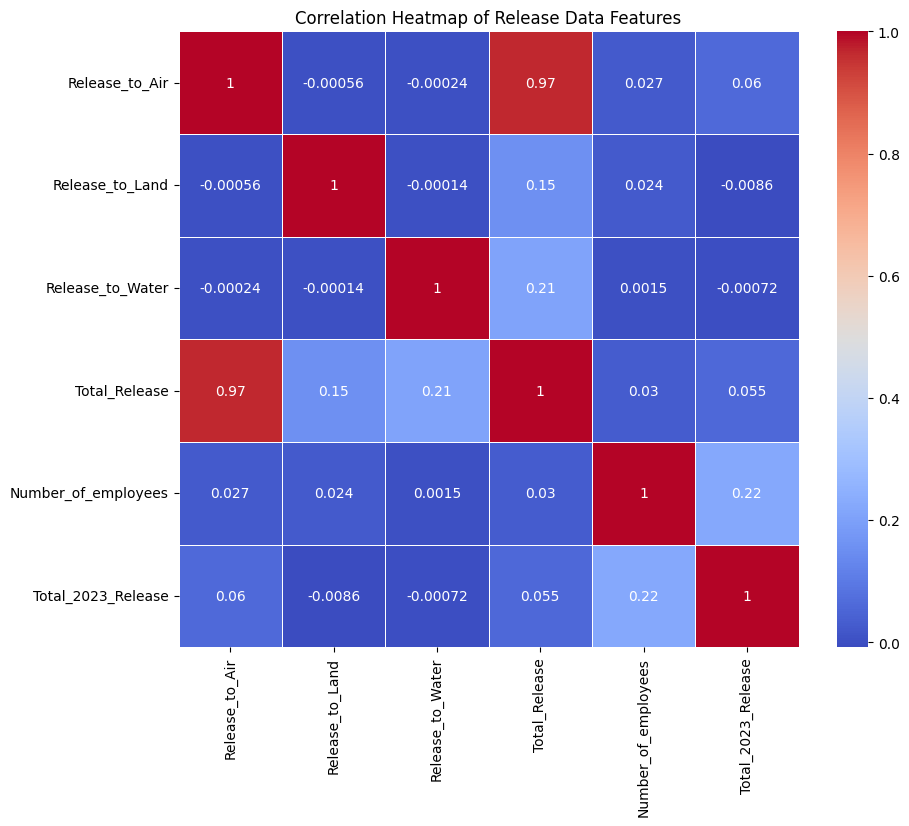

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant numerical columns for correlation analysis
correlation_columns = [
    'Release_to_Air',
    'Release_to_Land',
    'Release_to_Water',
    'Total_Release',
    'Number_of_employees',
    'Total_2023_Release'
]

# Create a new DataFrame with the selected columns
numerical_df = merged_data[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Release Data Features')
plt.show()


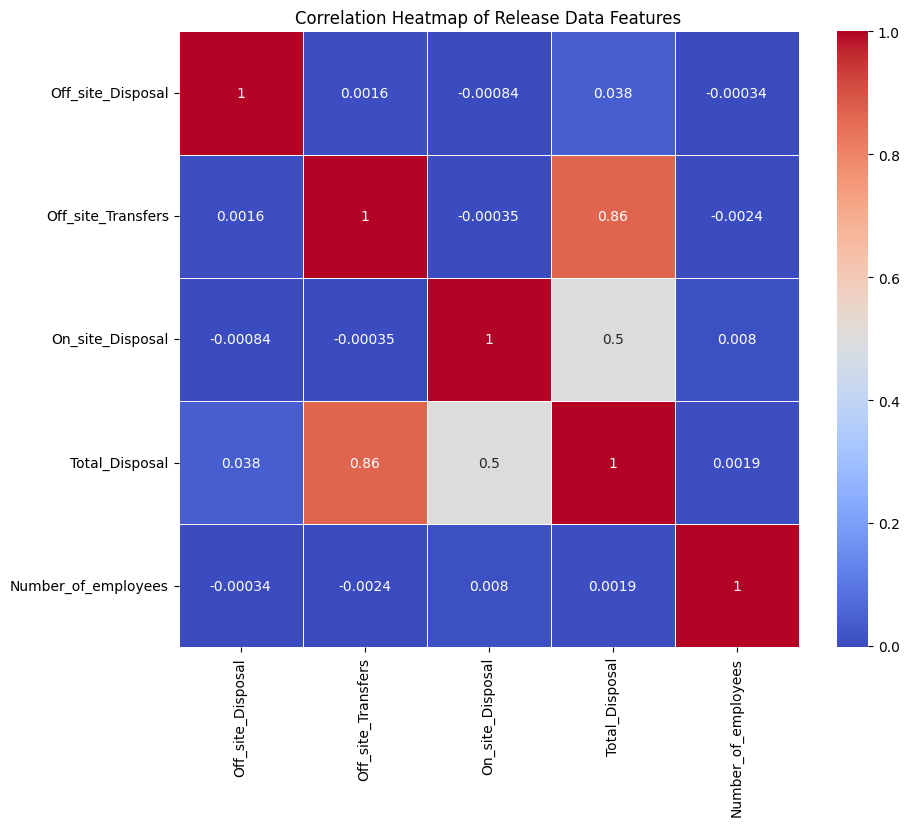

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant numerical columns for correlation analysis
correlation_Disposal_columns = [
    'Off_site_Disposal',
    'Off_site_Transfers',
    'On_site_Disposal',
    'Total_Disposal',
    'Number_of_employees'
]

# Create a new DataFrame with the selected columns
numerical_Disposal_df = df_Disposals_2000_2022[correlation_Disposal_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_Disposal_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Release Data Features')
plt.show()


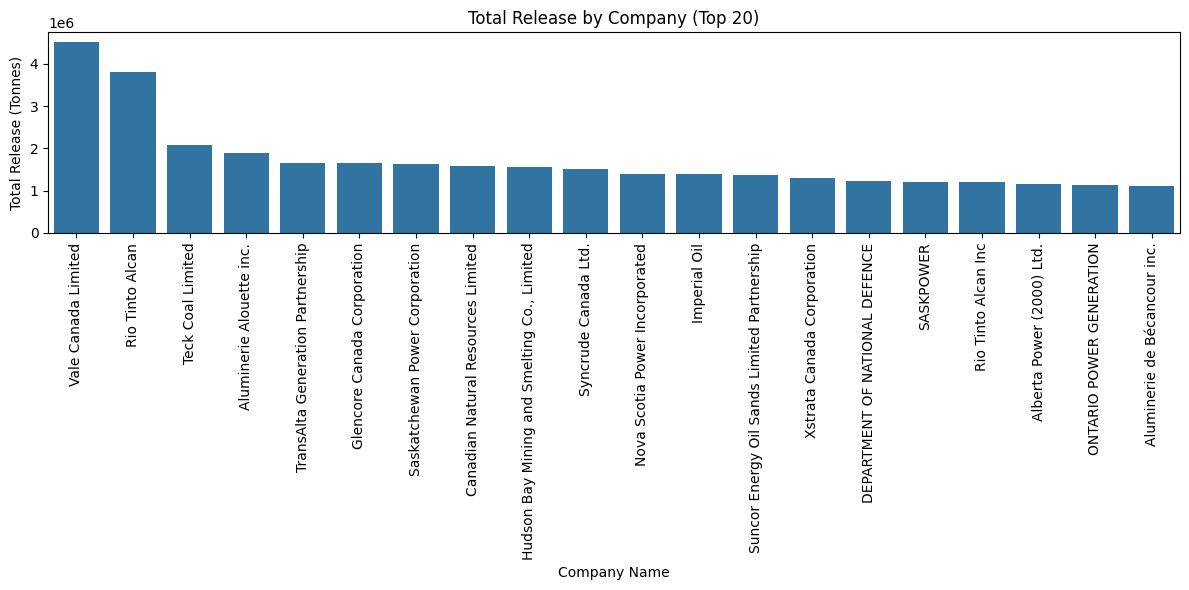

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate release data by company
company_release = merged_data.groupby('Company_Name')['Total_Release'].sum().reset_index()

# 2. Sort by total release for better visualization
company_release = company_release.sort_values(by=['Total_Release'], ascending=False)

# 3. Select top N companies for plotting (optional)
top_n = 20  # Change this to the desired number of companies
company_release_top = company_release.head(top_n)

# 4. Create the plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Company_Name', y='Total_Release', data=company_release_top)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Total Release by Company (Top {})'.format(top_n))
plt.xlabel('Company Name')
plt.ylabel('Total Release (Tonnes)')
plt.tight_layout()
plt.show()

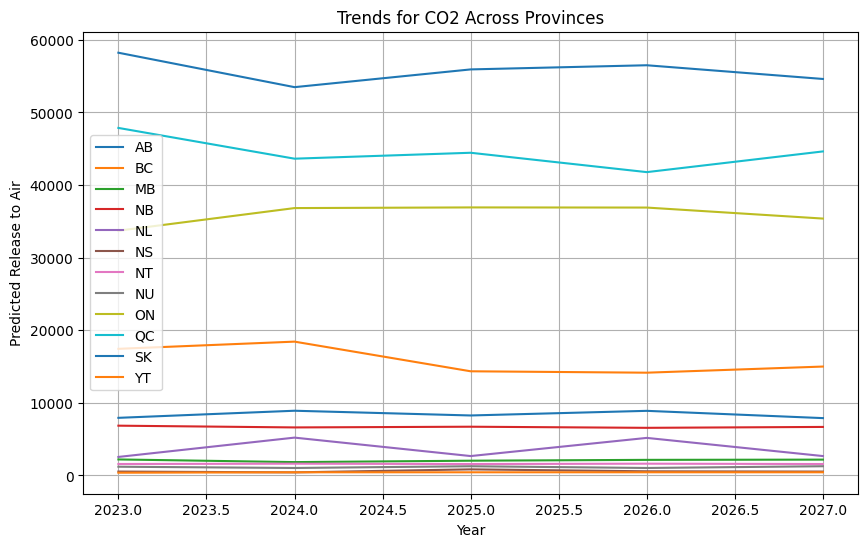

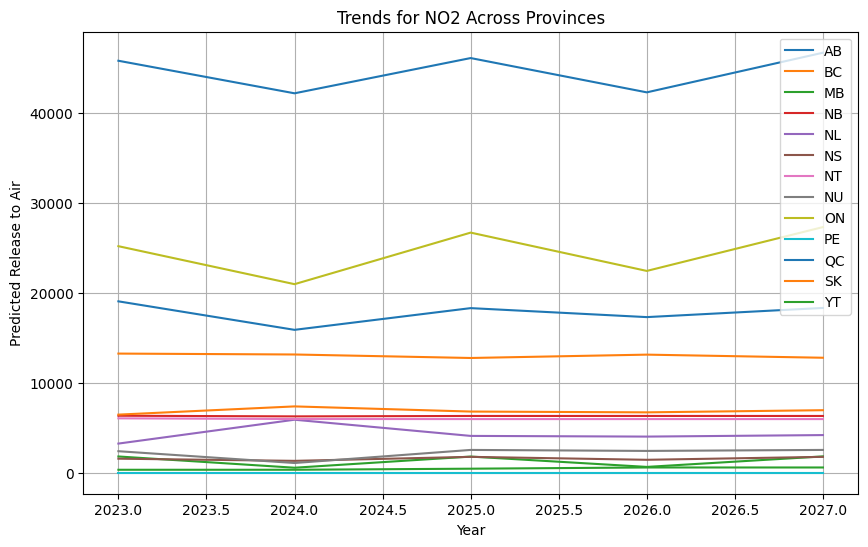

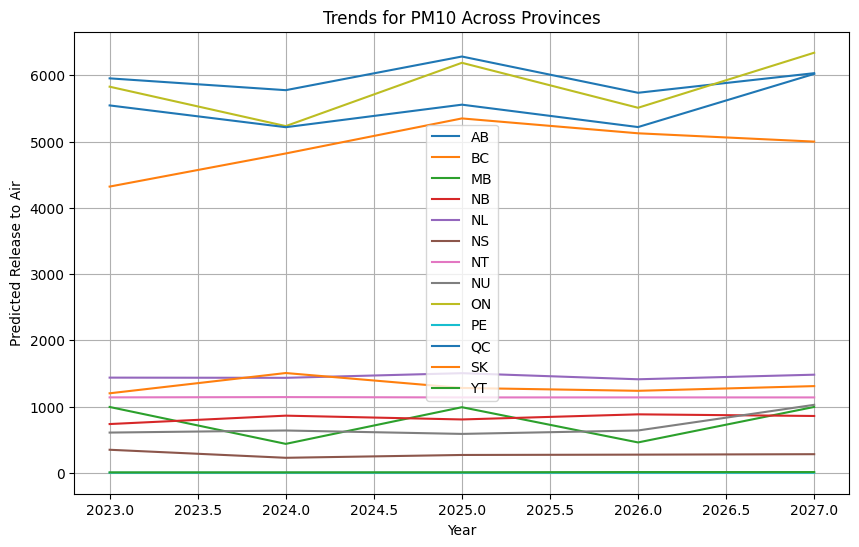

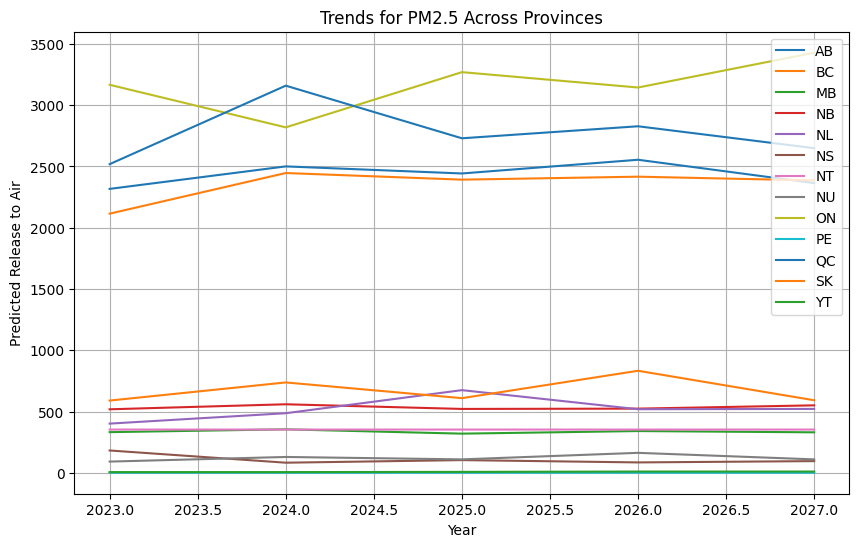

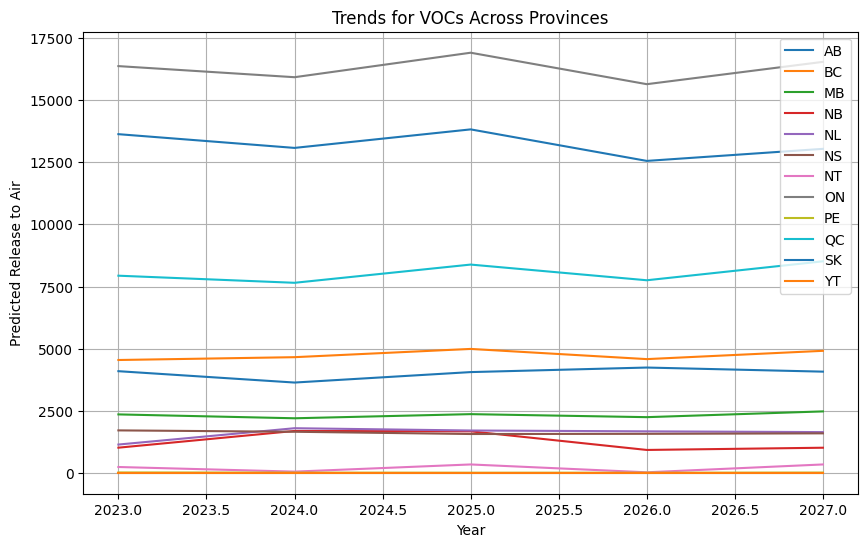

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# `combined_predictions` contains the merged predictions with columns: Province, Year, Substance, Predicted_Release_to_Air

# Analyze Trends for Each Substance Across Provinces
def analyze_trends(combined_predictions):
    trends = combined_predictions.groupby(['Province', 'Substance', 'Year'])['Predicted_Release_to_Air'].sum().reset_index()

    # Plot trends for each substance across provinces
    substances = trends['Substance'].unique()
    for substance in substances:
        plt.figure(figsize=(10, 6))
        substance_data = trends[trends['Substance'] == substance]
        for province in substance_data['Province'].unique():
            province_data = substance_data[substance_data['Province'] == province]
            plt.plot(province_data['Year'], province_data['Predicted_Release_to_Air'], label=province)

        plt.title(f"Trends for {substance} Across Provinces")
        plt.xlabel("Year")
        plt.ylabel("Predicted Release to Air")
        plt.legend()
        plt.grid(True)
        plt.show()
analyze_trends(combined_predictions_xgb)



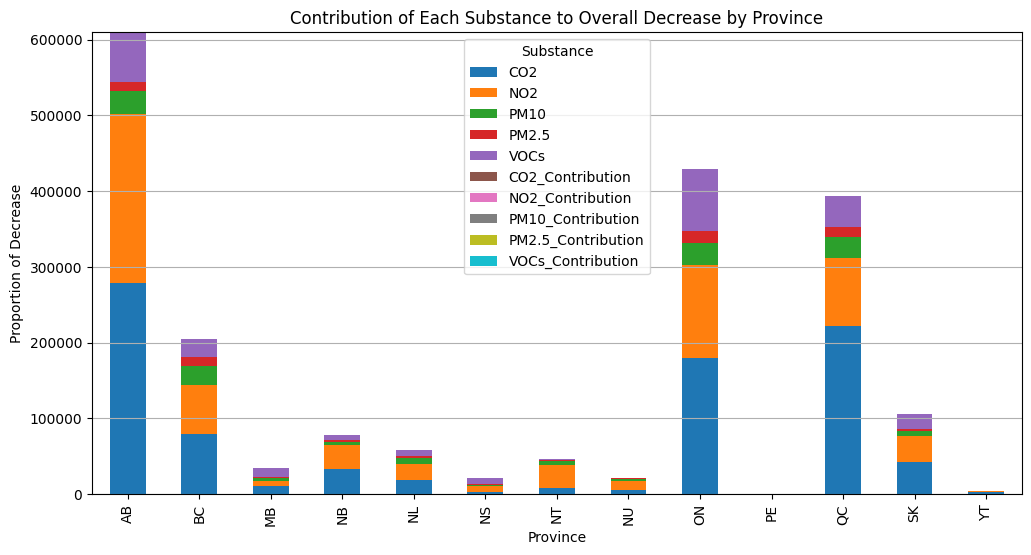

In [ ]:
# Step 2: Compare Substances at the Provincial Level
def compare_substances(combined_predictions):
    # Calculate total decrease for each substance by province
    predictions_grouped = combined_predictions.groupby(['Province', 'Substance'])['Predicted_Release_to_Air'].sum().reset_index()
    decrease_summary = predictions_grouped.pivot(index='Province', columns='Substance', values='Predicted_Release_to_Air')

    # Normalize the decreases to understand contributions
    decrease_summary['Total_Decrease'] = decrease_summary.sum(axis=1)
    for substance in decrease_summary.columns[:-1]:  # Exclude 'Total_Decrease'
        decrease_summary[f"{substance}_Contribution"] = decrease_summary[substance] / decrease_summary['Total_Decrease']

    # Visualize contributions using a stacked bar chart
    decrease_summary.drop('Total_Decrease', axis=1).plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title("Contribution of Each Substance to Overall Decrease by Province")
    plt.ylabel("Proportion of Decrease")
    plt.xlabel("Province")
    plt.legend(title="Substance")
    plt.grid(axis='y')
    plt.show()
compare_substances(combined_predictions_xgb)


In [ ]:
# Highlight Key Provinces for Each Substance
def highlight_key_provinces(combined_predictions):
    key_provinces = combined_predictions.groupby(['Substance', 'Province'])['Predicted_Release_to_Air'].sum().reset_index()
    key_provinces = key_provinces.sort_values(by=['Substance', 'Predicted_Release_to_Air'], ascending=False)

    # Display top 3 provinces for each substance
    top_provinces = key_provinces.groupby('Substance').head(3)
    print("Top 3 Provinces for Each Substance:")
    print(top_provinces)
    return top_provinces

top_provinces = highlight_key_provinces(combined_predictions_xgb)


Top 3 Provinces for Each Substance:
   Substance Province  Predicted_Release_to_Air
58      VOCs       ON              81337.773438
51      VOCs       AB              66097.351562
60      VOCs       QC              40234.363281
46     PM2.5       ON              15828.046875
48     PM2.5       QC              13885.519531
38     PM2.5       AB              12179.460938
25      PM10       AB              29784.685547
33      PM10       ON              29104.162109
35      PM10       QC              27561.503906
12       NO2       AB             223150.578125
20       NO2       ON             122665.617188
22       NO2       QC              88937.453125
0        CO2       AB             278763.406250
9        CO2       QC             222369.531250
8        CO2       ON             179750.703125


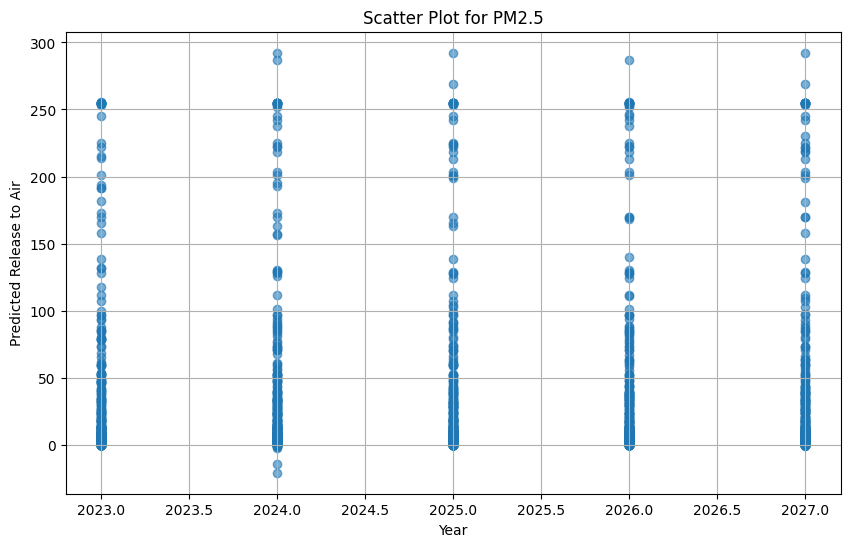

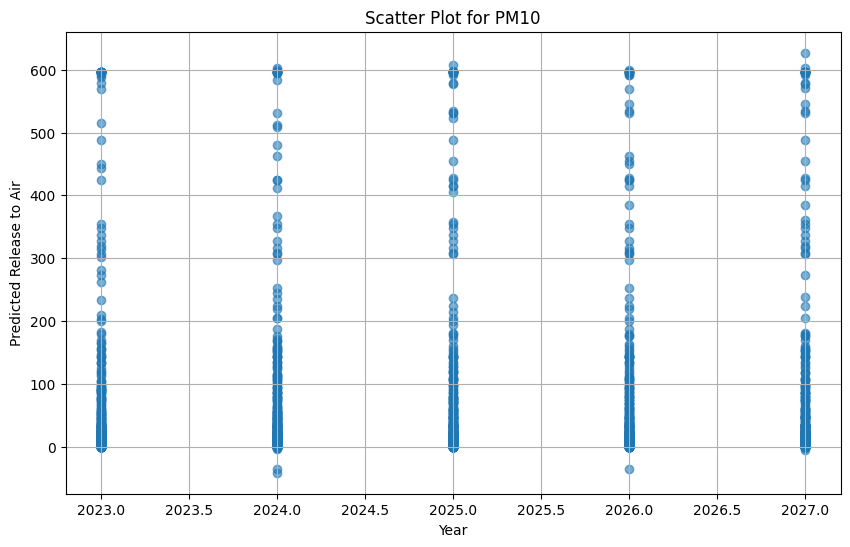

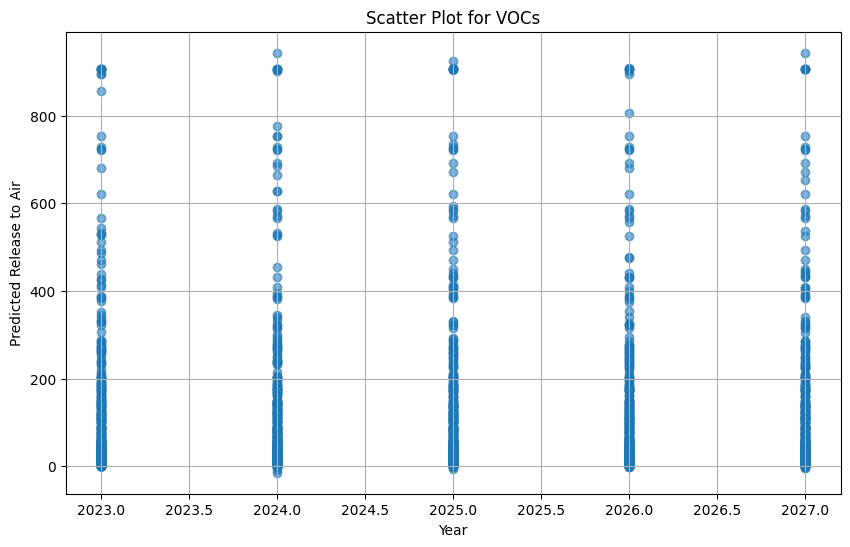

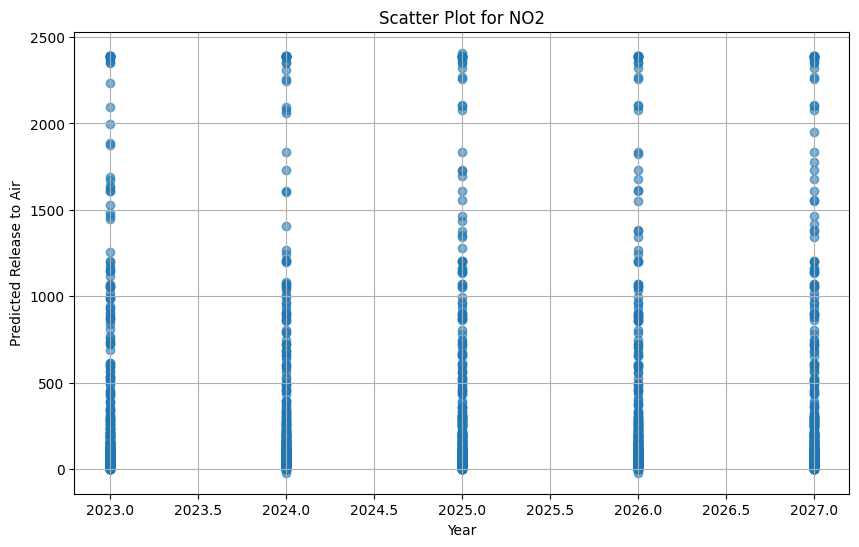

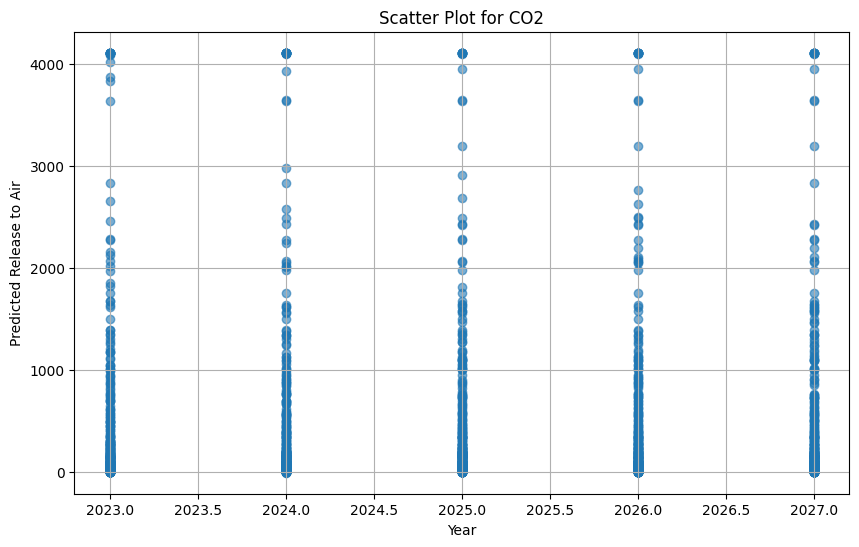

In [ ]:

# Investigate Outliers or Unexpected Trends
def investigate_outliers(combined_predictions):
    # Scatter plot for each substance to identify anomalies
    substances = combined_predictions['Substance'].unique()
    for substance in substances:
        plt.figure(figsize=(10, 6))
        substance_data = combined_predictions[combined_predictions['Substance'] == substance]
        plt.scatter(substance_data['Year'], substance_data['Predicted_Release_to_Air'], alpha=0.6)
        plt.title(f"Scatter Plot for {substance}")
        plt.xlabel("Year")
        plt.ylabel("Predicted Release to Air")
        plt.grid(True)
        plt.show()


investigate_outliers(combined_predictions_xgb)



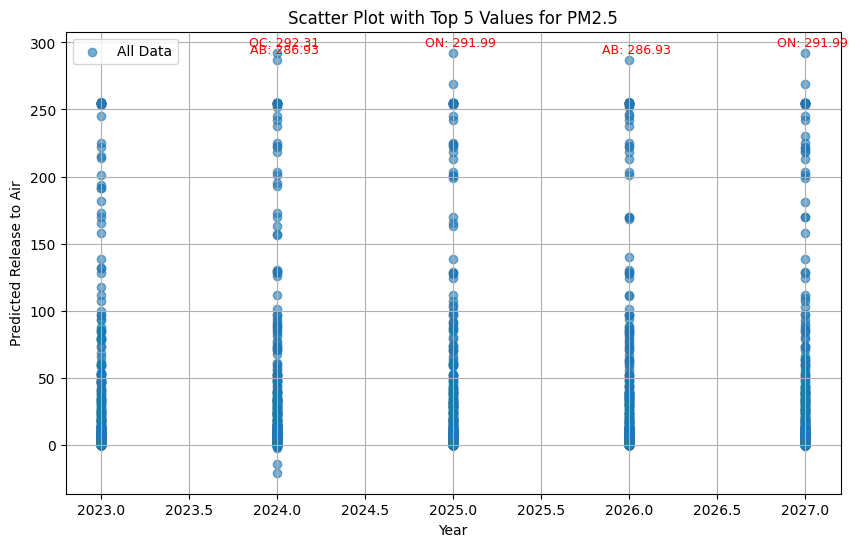

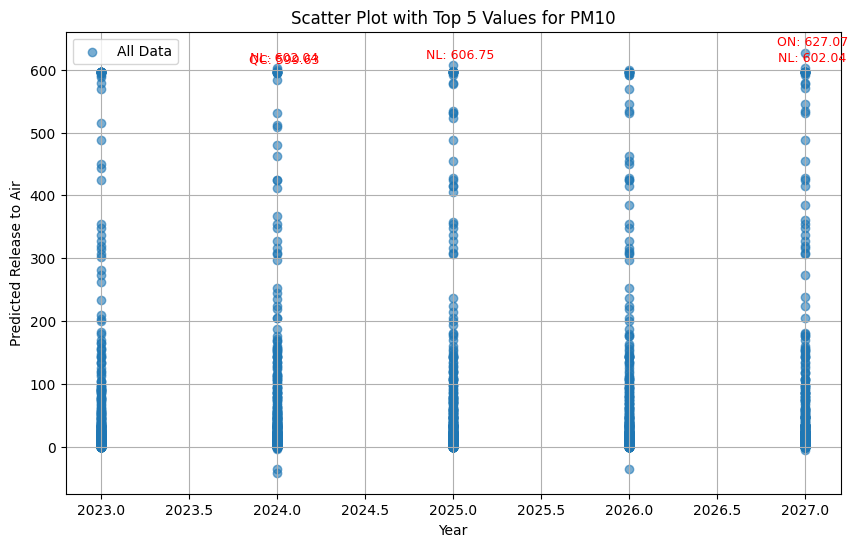

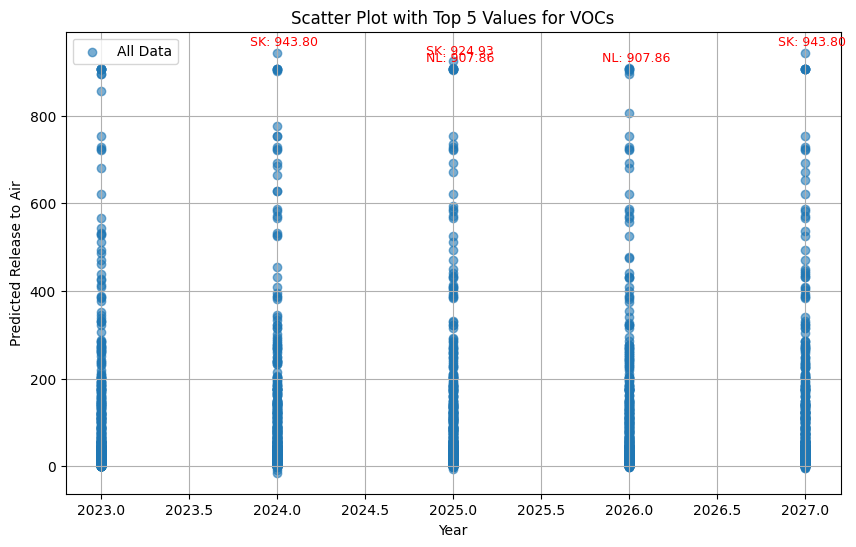

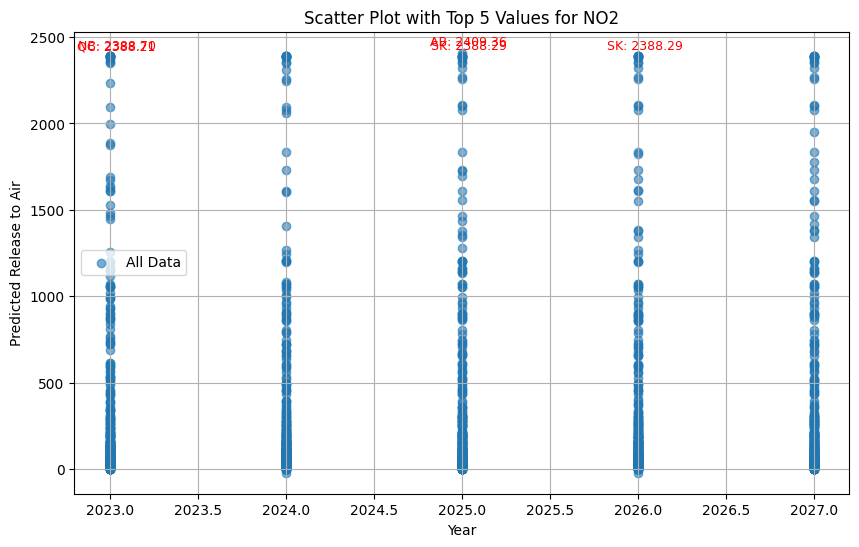

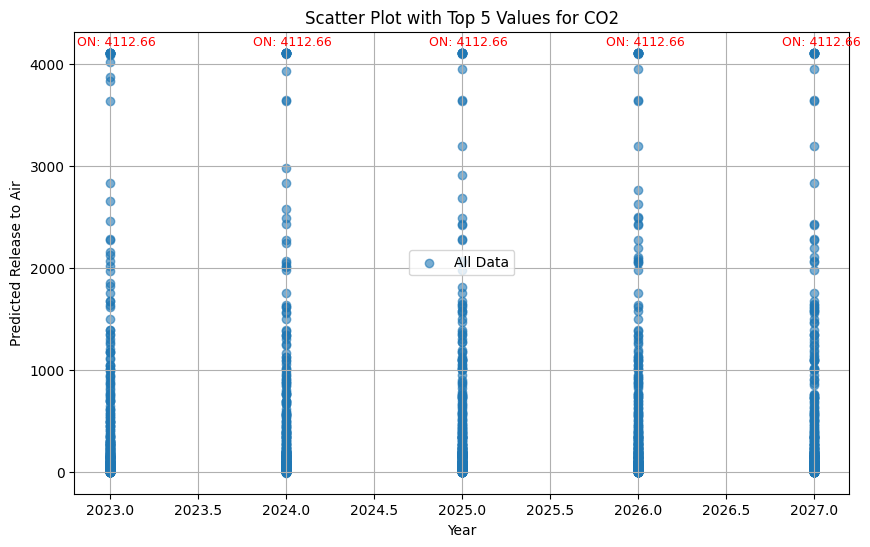

Detailed Outlier Analysis Summary:
  Substance        Mean          Max     Std Dev
0     PM2.5   23.314545   292.305664   52.707161
1      PM10   49.481552   627.066040  118.423615
2      VOCs   99.388870   943.798584  163.534210
3       NO2  328.467438  2409.362305  554.584778
4       CO2  462.349792  4112.655762  865.315613

Top 5 Predicted Values for Each Substance:
   Substance Province  Year  Predicted_Release_to_Air
0      PM2.5       QC  2024                292.305664
1      PM2.5       ON  2025                291.989197
2      PM2.5       ON  2027                291.989197
3      PM2.5       AB  2024                286.932373
4      PM2.5       AB  2026                286.932373
5       PM10       ON  2027                627.066040
6       PM10       NL  2025                606.746094
7       PM10       NL  2024                602.041626
8       PM10       NL  2027                602.041626
9       PM10       QC  2024                599.630859
10      VOCs       SK  2024      

In [ ]:
import seaborn as sns
import numpy as np

# Enhanced Investigation of Outliers
def investigate_outliers_with_details(combined_predictions):
    # Summary table for key statistics and top 5 values
    detailed_summary = []

    substances = combined_predictions['Substance'].unique()
    for substance in substances:
        substance_data = combined_predictions[combined_predictions['Substance'] == substance]

        # Calculate key statistics
        mean_val = substance_data['Predicted_Release_to_Air'].mean()
        max_val = substance_data['Predicted_Release_to_Air'].max()
        std_dev = substance_data['Predicted_Release_to_Air'].std()

        # Identify top 5 highest predicted values
        top_values = substance_data.nlargest(5, 'Predicted_Release_to_Air')
        detailed_summary.append({
            'Substance': substance,
            'Mean': mean_val,
            'Max': max_val,
            'Std Dev': std_dev,
            'Top 5 Values': top_values[['Province', 'Year', 'Predicted_Release_to_Air']].to_dict('records')
        })

        # Scatter plot with annotations for top 5 values
        plt.figure(figsize=(10, 6))
        plt.scatter(substance_data['Year'], substance_data['Predicted_Release_to_Air'], alpha=0.6, label='All Data')
        for _, row in top_values.iterrows():
            plt.annotate(f"{row['Province']}: {row['Predicted_Release_to_Air']:.2f}",
                         (row['Year'], row['Predicted_Release_to_Air']),
                         textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, color='red')
        plt.title(f"Scatter Plot with Top 5 Values for {substance}")
        plt.xlabel("Year")
        plt.ylabel("Predicted Release to Air")
        plt.grid(True)
        plt.legend()
        plt.show()

    # Convert detailed summary to a DataFrame for display
    detailed_summary_df = pd.DataFrame(detailed_summary)

    # Display the summary table
    print("Detailed Outlier Analysis Summary:")
    print(detailed_summary_df[['Substance', 'Mean', 'Max', 'Std Dev']])

    # Optionally, save top 5 detailed records as a table
    top_values_summary = []
    for record in detailed_summary:
        for value in record['Top 5 Values']:
            top_values_summary.append({
                'Substance': record['Substance'],
                'Province': value['Province'],
                'Year': value['Year'],
                'Predicted_Release_to_Air': value['Predicted_Release_to_Air']
            })
    top_values_df = pd.DataFrame(top_values_summary)
    print("\nTop 5 Predicted Values for Each Substance:")
    print(top_values_df)
    return top_values_df

# Run the enhanced outlier investigation
top_values_df = investigate_outliers_with_details(combined_predictions_xgb)


In [ ]:
# Summary Recommendations
def summarize_findings(combined_predictions_xgb):
    summary = combined_predictions_xgb.groupby(['Substance', 'Province'])['Predicted_Release_to_Air'].sum().reset_index()
    summary['Rank'] = summary.groupby('Substance')['Predicted_Release_to_Air'].rank(ascending=True)
    print("Summary of Key Findings:")
    print(summary.sort_values(by=['Substance', 'Rank']))

# Run the analysis
summarize_findings(combined_predictions_xgb)

Summary of Key Findings:
   Substance Province  Predicted_Release_to_Air  Rank
11       CO2       YT               2121.927979   1.0
5        CO2       NS               2908.523193   2.0
7        CO2       NU               5803.001953   3.0
6        CO2       NT               7966.167480   4.0
2        CO2       MB              10404.351562   5.0
..       ...      ...                       ...   ...
61      VOCs       SK              20120.902344   8.0
52      VOCs       BC              23697.718750   9.0
60      VOCs       QC              40234.363281  10.0
51      VOCs       AB              66097.351562  11.0
58      VOCs       ON              81337.773438  12.0

[63 rows x 4 columns]



# Policy Recommendations for AB:

Alberta may require stricter environmental regulations, investments in clean technologies, and targeted reductions in emissions.
Acknowledging Low Emitters like PE:

While PE contributes less overall, maintaining low emissions is vital for sustainability.

# Emission Summary Table

In [ ]:
print(combined_predictions_xgb.head())

   Year Province Substance              Company_Name  Number_of_employees  \
0  2023       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
1  2024       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
2  2025       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
3  2026       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
4  2027       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   

   Predicted_Release_to_Air  
0                  2.116039  
1                  2.116039  
2                  2.116039  
3                  2.116039  
4                  2.116039  


In [ ]:
# Filter combined_predictions_xgb for the year 2024
predictions_2024 = combined_predictions_xgb[combined_predictions_xgb['Year'] == 2024]

# Summarize emissions by province and substance for the year 2024
emission_summary_2024 = predictions_2024.groupby(['Province', 'Substance'])['Predicted_Release_to_Air'].sum().reset_index()

# Calculate total emissions for 2024
total_emissions_2024 = emission_summary_2024['Predicted_Release_to_Air'].sum()

# Calculate percentage contribution for the year 2024
emission_summary_2024['Percentage_Contribution'] = (emission_summary_2024['Predicted_Release_to_Air'] / total_emissions_2024) * 100

# Format the percentage contribution column for better readability
emission_summary_2024['Percentage_Contribution'] = emission_summary_2024['Percentage_Contribution'].round(2)

# Display the summary table for 2024
print("Emission Summary Table for 2024:")
print(emission_summary_2024.head())


Emission Summary Table for 2024:
  Province Substance  Predicted_Release_to_Air  Percentage_Contribution
0       AB       CO2              53486.410156                    13.61
1       AB       NO2              42198.726562                    10.74
2       AB      PM10               5776.237305                     1.47
3       AB     PM2.5               2500.551514                     0.64
4       AB      VOCs              13072.125977                     3.33


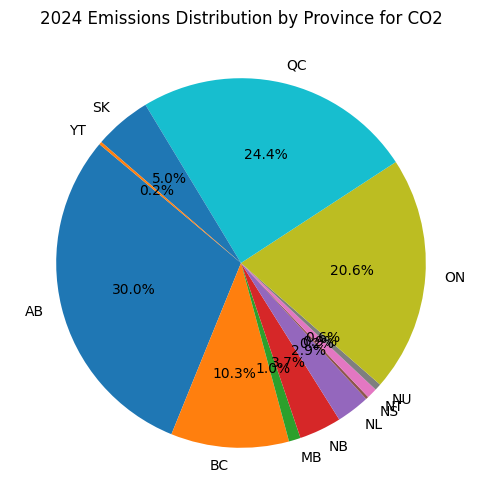

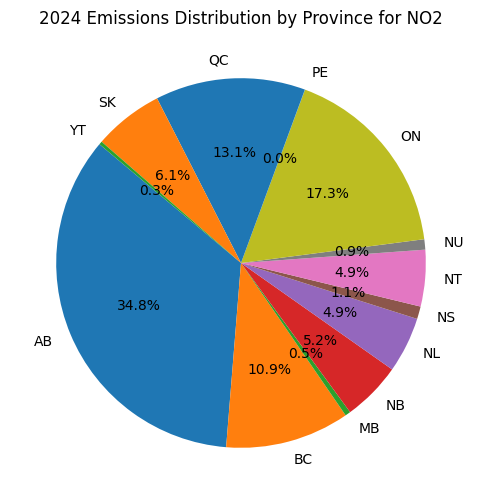

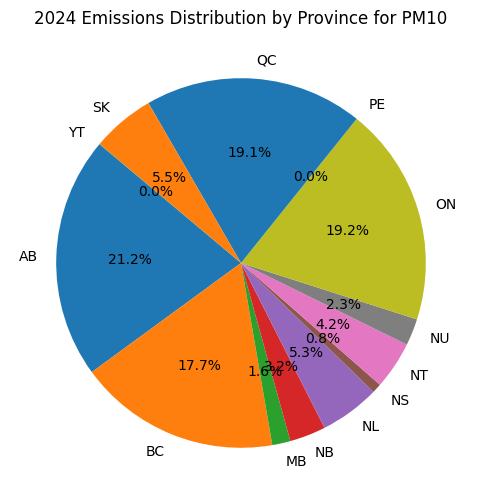

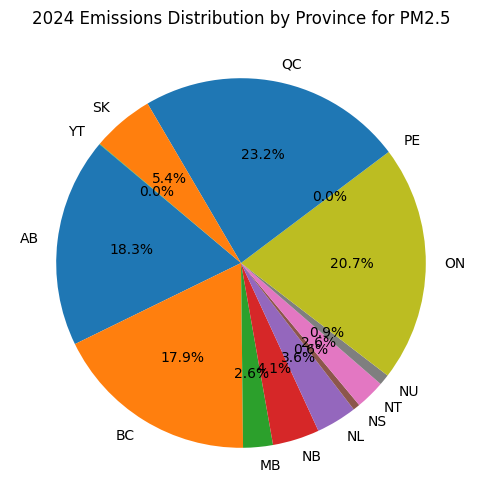

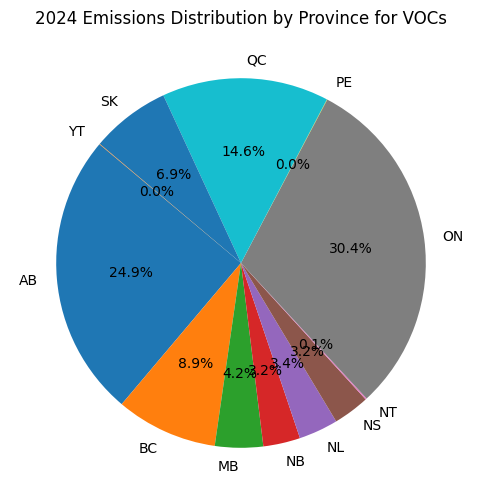

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart for each substance's emissions for the year 2024
substances = emission_summary_2024['Substance'].unique()

for substance in substances:
    substance_data = emission_summary_2024[emission_summary_2024['Substance'] == substance]

    # Filter out negative values before creating the pie chart
    substance_data = substance_data[substance_data['Predicted_Release_to_Air'] >= 0]

    if not substance_data.empty:  # Check if there's data left after filtering
        plt.figure(figsize=(8, 6))
        plt.pie(
            substance_data['Predicted_Release_to_Air'],
            labels=substance_data['Province'],
            autopct='%1.1f%%',
            startangle=140
        )
        plt.title(f"2024 Emissions Distribution by Province for {substance}")
        plt.show()
    else:
        print(f"No positive emission data for {substance} in 2024. Skipping pie chart.")

In [ ]:
# Summarize emissions by province and substance
emission_summary = combined_predictions_xgb.groupby(['Province', 'Substance'])['Predicted_Release_to_Air'].sum().reset_index()

# Calculate percentage contribution
total_emissions = emission_summary['Predicted_Release_to_Air'].sum()
emission_summary['Percentage_Contribution'] = (emission_summary['Predicted_Release_to_Air'] / total_emissions) * 100

# Display the summary table
print("Emission Summary Table:")
print(emission_summary)


Emission Summary Table:
   Province Substance  Predicted_Release_to_Air  Percentage_Contribution
0        AB       CO2             278763.406250                13.897902
1        AB       NO2             223150.578125                11.125294
2        AB      PM10              29784.685547                 1.484932
3        AB     PM2.5              12179.460938                 0.607214
4        AB      VOCs              66097.351562                 3.295320
..      ...       ...                       ...                      ...
58       YT       CO2               2121.927979                 0.105790
59       YT       NO2               2346.551758                 0.116989
60       YT      PM10                 39.479553                 0.001968
61       YT     PM2.5                 38.637478                 0.001926
62       YT      VOCs                 99.649170                 0.004968

[63 rows x 4 columns]


In [ ]:
# Predict for 2023 to 2027 and classify predictions into Low, Medium, High levels.

# Filter combined_predictions for years 2023 to 2027
future_predictions = combined_predictions_xgb[combined_predictions_xgb['Year'].between(2023, 2027)]

# Calculate thresholds for Low, Medium, High based on quantiles
low_threshold = future_predictions['Predicted_Release_to_Air'].quantile(0.33)
high_threshold = future_predictions['Predicted_Release_to_Air'].quantile(0.66)

# Add a classification column
def classify_release(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

future_predictions['Prediction_Level'] = future_predictions['Predicted_Release_to_Air'].apply(classify_release)

# Summarize the classification
classification_summary = future_predictions.groupby(['Substance', 'Year', 'Prediction_Level']).size().reset_index(name='Count')

# Display the updated DataFrame and summary
print("Future Predictions with Classification:")
print(future_predictions)
print("\nClassification Summary:")
print(classification_summary)


Future Predictions with Classification:
       Year Province Substance              Company_Name  Number_of_employees  \
0      2023       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
1      2024       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
2      2025       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
3      2026       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
4      2027       AB     PM2.5  ACCEL Energy Canada Ltd.                   18   
...     ...      ...       ...                       ...                  ...   
12325  2023       YT       CO2        Yukon Energy Corp.                   89   
12326  2024       YT       CO2        Yukon Energy Corp.                   89   
12327  2025       YT       CO2        Yukon Energy Corp.                   89   
12328  2026       YT       CO2        Yukon Energy Corp.                   89   
12329  2027       YT       CO2        Yukon Energy Corp.             

# Encoding Prediction_Level

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode the Prediction_Level column
future_predictions['Prediction_Level_Encoded'] = encoder.fit_transform(future_predictions['Prediction_Level'])

# Display the adjusted DataFrame with the new encoding
print("Future Predictions with Label Encoding:")
print(future_predictions[['Year', 'Province', 'Substance', 'Predicted_Release_to_Air', 'Prediction_Level', 'Prediction_Level_Encoded']])

# Summarize the classification with adjusted encoding
classification_summary = future_predictions.groupby(['Substance', 'Year', 'Prediction_Level', 'Prediction_Level_Encoded']).size().reset_index(name='Count')

# Display the adjusted classification summary
print("\nAdjusted Classification Summary:")
print(classification_summary)


Future Predictions with Label Encoding:
       Year Province Substance  Predicted_Release_to_Air Prediction_Level  \
0      2023       AB     PM2.5                  2.116039              Low   
1      2024       AB     PM2.5                  2.116039              Low   
2      2025       AB     PM2.5                  2.116039              Low   
3      2026       AB     PM2.5                  2.116039              Low   
4      2027       AB     PM2.5                  2.116039              Low   
...     ...      ...       ...                       ...              ...   
12325  2023       YT       CO2                376.364716             High   
12326  2024       YT       CO2                436.390808             High   
12327  2025       YT       CO2                436.390808             High   
12328  2026       YT       CO2                436.390808             High   
12329  2027       YT       CO2                436.390808             High   

       Prediction_Level_Encoded  
0

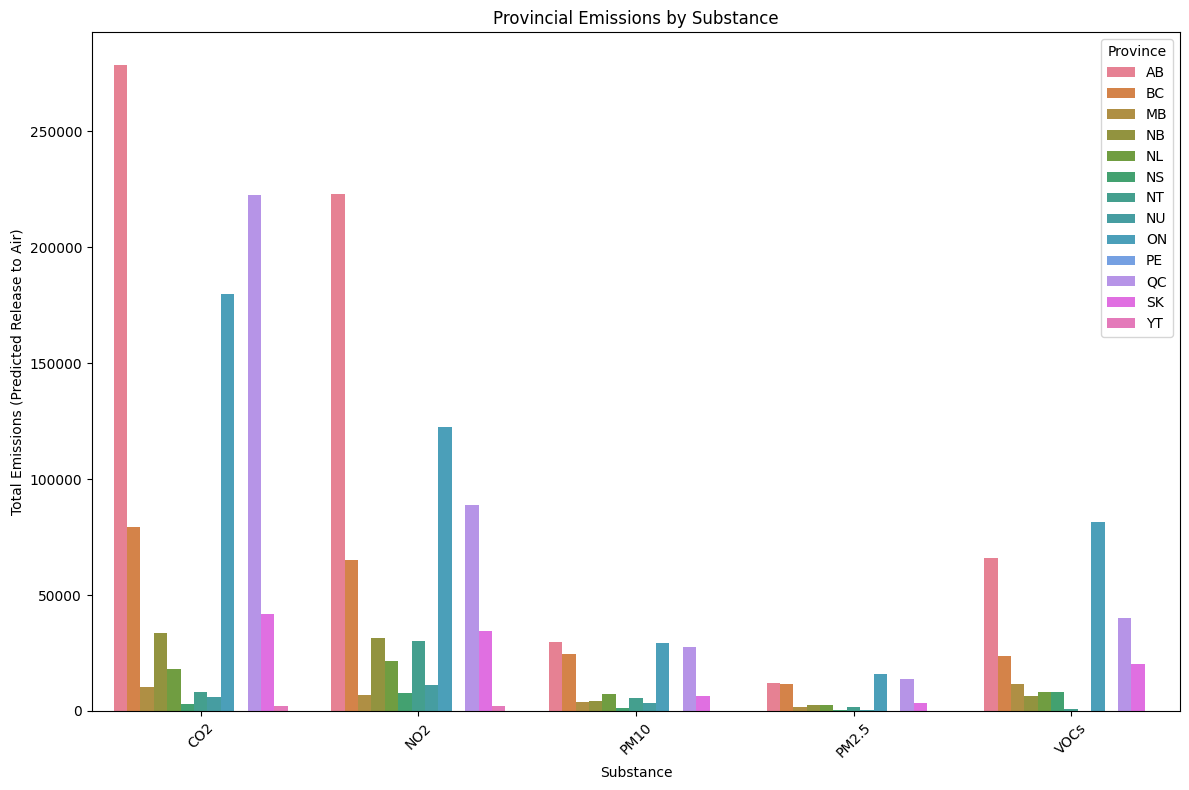

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    data=emission_summary,
    x='Substance',
    y='Predicted_Release_to_Air',
    hue='Province'
)
plt.title("Provincial Emissions by Substance")
plt.xlabel("Substance")
plt.ylabel("Total Emissions (Predicted Release to Air)")
plt.legend(title="Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Applying Normalization for Outlier
- Using Normalization 'MinMaxScaler to see the different with above strategy


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary for easy access to substances and their data
substances = {
    "PM2.5": PM25_df,
    "PM10": PM10_df,
    "VOCs": VOCs_df,
    "NO2": NO2_df,
    "CO2": CO2_df
}




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize data
def normalize_column(data, column_name):
    scaler = MinMaxScaler()
    data[column_name] = scaler.fit_transform(data[[column_name]])
    return data

# Apply normalization and display the data
for substance_name, df in substances.items():
    print(f"Normalizing {substance_name}...")

    # Normalize the 'Release_to_Air' column
    normalized_df = normalize_column(df.copy(), 'Release_to_Air')

    # Display the first few rows of the normalized data
    print(f"Normalized Data for {substance_name}:")
    print(normalized_df[['Province', 'Reporting_Year', 'Release_to_Air']].head())  # Adjust columns to display as needed
    print("\n")


Normalizing PM2.5...
Normalized Data for PM2.5:
      Province  Reporting_Year  Release_to_Air
20060       AB            2002        0.752168
20090       MB            2002        1.000000
20114       AB            2002        0.008091
20134       QC            2002        0.002273
20140       ON            2002        0.000212


Normalizing PM10...
Normalized Data for PM10:
      Province  Reporting_Year  Release_to_Air
20059       AB            2002        0.354103
20089       MB            2002        1.000000
20113       AB            2002        0.008059
20133       QC            2002        0.001456
20138       ON            2002        0.000090


Normalizing VOCs...
Normalized Data for VOCs:
      Province  Reporting_Year  Release_to_Air
20061       AB            2002        0.541709
20091       MB            2002        0.080274
20115       AB            2002        0.013396
20116       AB            2002        0.086854
20160       ON            2002        0.063601


Normaliz

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Evaluation function
def evaluate_model_Nor(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

# Verify and normalize substance DataFrame columns
def verify_and_normalize_substance_data_Nor(substance_data):
    required_columns = ['Province', 'Reporting_Year', 'Release_to_Air']
    for column in required_columns:
        if column not in substance_data.columns:
            print(f"Column '{column}' is missing in the DataFrame. Adding placeholder values.")
            if column == 'Province':
                substance_data[column] = 'Unknown'
            elif column == 'Reporting_Year':
                substance_data[column] = 2000
            elif column == 'Release_to_Air':
                substance_data[column] = 0.0

    # Normalize Release_to_Air for consistency
    scaler = MinMaxScaler()
    if 'Release_to_Air' in substance_data.columns:
        substance_data['Release_to_Air'] = scaler.fit_transform(substance_data[['Release_to_Air']])
    return substance_data

# Apply verification and normalization for each substance
top_substances_Nor = {
    "PM2.5": verify_and_normalize_substance_data_Nor(PM25_df),
    "PM10": verify_and_normalize_substance_data_Nor(PM10_df),
    "VOCs": verify_and_normalize_substance_data_Nor(VOCs_df),
    "NO2": verify_and_normalize_substance_data_Nor(NO2_df),
    "CO2": verify_and_normalize_substance_data_Nor(CO2_df),
}

# Initialize results storage
all_results_Nor = {}

# Process each substance
for substance_name, substance_data in top_substances_Nor.items():
    print(f"Processing substance: {substance_name}")

    # Aggregate data by Province and Year
    substance_aggregated_Nor = substance_data.groupby(['Province', 'Reporting_Year']).agg({
        'Release_to_Air': 'sum',
    }).reset_index()

    # Prepare lagged features
    substance_aggregated_Nor['lag_1'] = substance_aggregated_Nor['Release_to_Air'].shift(1)
    substance_aggregated_Nor['lag_2'] = substance_aggregated_Nor['Release_to_Air'].shift(2)
    substance_aggregated_Nor = substance_aggregated_Nor.dropna()

    # Check if data is sufficient
    if substance_aggregated_Nor.empty:
        print(f"No sufficient data for substance: {substance_name}. Skipping...")
        continue

    # Define features and target
    X_Nor = substance_aggregated_Nor[['lag_1', 'lag_2']]
    y_Nor = substance_aggregated_Nor['Release_to_Air']

    # Split into training and testing sets
    X_train_Nor, X_test_Nor, y_train_Nor, y_test_Nor = train_test_split(X_Nor, y_Nor, test_size=0.2, random_state=42)

    # Initialize models
    models_Nor = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }

    # Train and evaluate models
    results_Nor = {}
    for model_name, model in models_Nor.items():
        print(f"Training {model_name} for {substance_name}...")
        model.fit(X_train_Nor, y_train_Nor)
        y_pred_Nor = model.predict(X_test_Nor)
        results_Nor[model_name] = evaluate_model_Nor(y_test_Nor, y_pred_Nor)

    # Store the results for the current substance
    all_results_Nor[substance_name] = pd.DataFrame(results_Nor).T

# Combine all results into a single DataFrame
final_results_df_Nor = pd.concat(all_results_Nor, names=["Substance", "Model"])

# Display the results
print("\nFinal Model Evaluation Results with Normalization:")
print(final_results_df_Nor)


Processing substance: PM2.5
Training Linear Regression for PM2.5...
Training Decision Tree for PM2.5...
Training Random Forest for PM2.5...
Training XGBoost for PM2.5...
Training KNN for PM2.5...
Processing substance: PM10
Training Linear Regression for PM10...
Training Decision Tree for PM10...
Training Random Forest for PM10...
Training XGBoost for PM10...
Training KNN for PM10...
Processing substance: VOCs
Training Linear Regression for VOCs...
Training Decision Tree for VOCs...
Training Random Forest for VOCs...
Training XGBoost for VOCs...
Training KNN for VOCs...
Processing substance: NO2
Training Linear Regression for NO2...
Training Decision Tree for NO2...
Training Random Forest for NO2...
Training XGBoost for NO2...
Training KNN for NO2...
Processing substance: CO2
Training Linear Regression for CO2...
Training Decision Tree for CO2...
Training Random Forest for CO2...
Training XGBoost for CO2...
Training KNN for CO2...

Final Model Evaluation Results with Normalization:
    

Hyperparameter grids for tuning

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import pandas as pd
import numpy as np

# Evaluation function
def evaluate_model_Tnor(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

# Hyperparameter grids for tuning
param_grids_Tnor = {
    "Linear Regression": {},  # No hyperparameters for Linear Regression
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "n_estimators": [50, 100, 200],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
    },
}

# Initialize storage for results
all_results_Tnor = {}
best_models_Tnor = {}

# Iterate over substances for tuning
for substance_name, substance_data in top_substances.items():
    print(f"Processing substance: {substance_name}")

    # Aggregate data by Province and Year
    substance_aggregated = substance_data.groupby(['Province', 'Reporting_Year']).agg({
        'Release_to_Air': 'sum',
    }).reset_index()

    # Prepare lagged features
    substance_aggregated['lag_1'] = substance_aggregated['Release_to_Air'].shift(1)
    substance_aggregated['lag_2'] = substance_aggregated['Release_to_Air'].shift(2)
    substance_aggregated = substance_aggregated.dropna()

    # Check if data is sufficient
    if substance_aggregated.empty:
        print(f"No sufficient data for {substance_name}. Skipping...")
        continue

    # Define features and target
    X_Tnor = substance_aggregated[['lag_1', 'lag_2']]
    y_Tnor = substance_aggregated['Release_to_Air']

    # Split into training and testing sets
    X_train_Tnor, X_test_Tnor, y_train_Tnor, y_test_Tnor = train_test_split(X_Tnor, y_Tnor, test_size=0.2, random_state=42)

    # Initialize models
    models_Tnor = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
        "KNN": KNeighborsRegressor(),
    }

    # Train and tune models
    results_Tnor = {}
    for model_name, model in models_Tnor.items():
        print(f"Tuning {model_name} for {substance_name}...")
        grid_search_Tnor = GridSearchCV(model, param_grids_Tnor[model_name], cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
        grid_search_Tnor.fit(X_train_Tnor, y_train_Tnor)

        # Get best estimator and evaluate
        best_model_Tnor = grid_search_Tnor.best_estimator_
        y_pred_Tnor = best_model_Tnor.predict(X_test_Tnor)
        metrics_Tnor = evaluate_model_Tnor(y_test_Tnor, y_pred_Tnor)
        metrics_Tnor["Best Parameters"] = grid_search_Tnor.best_params_

        results_Tnor[model_name] = metrics_Tnor

        # Store the best model for further predictions
        if model_name not in best_models_Tnor or metrics_Tnor["R^2"] > best_models_Tnor.get(model_name, {}).get("R^2", -np.inf):
            best_models_Tnor[substance_name] = {"model": best_model_Tnor, "R^2": metrics_Tnor["R^2"]}

    # Store results for the current substance
    all_results_Tnor[substance_name] = pd.DataFrame(results_Tnor).T

# Combine all results into a single DataFrame
final_results_df_Tnor = pd.concat(all_results_Tnor, names=["Substance", "Model"])

# Display the results
print("\nFinal Tuning Results (_Tnor):")
print(final_results_df_Tnor)

# Display the best models for each substance
print("\nBest Models for Each Substance (_Tnor):")
for substance, model_info in best_models_Tnor.items():
    print(f"{substance}: {model_info}")


Processing substance: PM2.5
Tuning Linear Regression for PM2.5...
Tuning Decision Tree for PM2.5...
Tuning Random Forest for PM2.5...
Tuning XGBoost for PM2.5...
Tuning KNN for PM2.5...
Processing substance: PM10
Tuning Linear Regression for PM10...
Tuning Decision Tree for PM10...
Tuning Random Forest for PM10...
Tuning XGBoost for PM10...
Tuning KNN for PM10...
Processing substance: VOCs
Tuning Linear Regression for VOCs...
Tuning Decision Tree for VOCs...
Tuning Random Forest for VOCs...
Tuning XGBoost for VOCs...
Tuning KNN for VOCs...
Processing substance: NO2
Tuning Linear Regression for NO2...
Tuning Decision Tree for NO2...
Tuning Random Forest for NO2...
Tuning XGBoost for NO2...
Tuning KNN for NO2...
Processing substance: CO2
Tuning Linear Regression for CO2...
Tuning Decision Tree for CO2...
Tuning Random Forest for CO2...
Tuning XGBoost for CO2...
Tuning KNN for CO2...

Final Tuning Results (_Tnor):
                                  MAE         MSE       RMSE       R^2  \
S

In [ ]:


import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Define future years for prediction
future_years = range(2023, 2028)  # Predict for 2023 to 2027

# Dictionary to store predictions for all substances
future_predictions_all_Tnor = {}

# Predict releases per province for each substance
for substance_name, substance_data in substances.items():
    print(f"Processing substance: {substance_name}...")

    # Aggregate data by Province and Year
    # Ensure 'NPRI_ID / No_INRP' is present in the aggregation
    aggregation_columns = {
        'Release_to_Air': 'sum',
        'Number_of_employees': 'mean',
        'Company_Name': 'first',
        'NAICS_Code': 'first'
    }
    # Conditionally add 'NPRI_ID / No_INRP' if it exists
    if 'NPRI_ID / No_INRP' in substance_data.columns:
        aggregation_columns['NPRI_ID / No_INRP'] = lambda x: x.iloc[0]

    substance_aggregated = substance_data.groupby(['Province', 'Reporting_Year']).agg(
        aggregation_columns
    ).reset_index()


# Define future years for prediction
future_years = range(2023, 2028)  # Predict for 2023 to 2027

# Dictionary to store predictions for all substances
future_predictions_all_knn = {}

# Predict releases per province for each substance
for substance_name, substance_data in substances.items():  # Iterate over substances
    future_predictions_knn = []
    for (province, company_name), province_company_data in substance_data.groupby(['Province', 'Company_Name']):
        # Calculate lag features for each province-company combination
        province_company_data['lag_1'] = province_company_data['Release_to_Air'].shift(1)
        province_company_data['lag_2'] = province_company_data['Release_to_Air'].shift(2)
        province_company_data = province_company_data.dropna()  # Drop rows with NaN due to lag calculation

        if province_company_data.empty:  # Check if DataFrame is empty after dropping NaNs
            print(f"No sufficient data for {substance_name} in {province}, {company_name}. Skipping...")
            continue

        # Features and target
        X = province_company_data[['lag_1', 'lag_2', 'Reporting_Year', 'Number_of_employees']]
        y = province_company_data['Release_to_Air']

        # Train XGBoost Regressor model
        model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
        model_xgb.fit(X, y)

        # Get the last two lag values and other features for prediction
        last_row = province_company_data.tail(1)
        last_lags = last_row[['lag_1', 'lag_2']].values
        reporting_year = last_row['Reporting_Year'].values[0]
        num_employees = last_row['Number_of_employees'].values[0]

        # Predict for future years
        predictions_xgb = []
        for year in future_years:
            # Create prediction input with all features
            prediction_input = [[last_lags[0][0], last_lags[0][1], year, num_employees]]

            predicted_value = model_xgb.predict(prediction_input)[0]
            predictions_xgb.append({
                'Year': year,
                'Province': province,
                'Substance': substance_name,
                'Company_Name': company_name,
                'Number_of_employees': num_employees,
                'Predicted_Release_to_Air': predicted_value
            })

            # Update lags for next year's prediction
            last_lags = [[predicted_value, last_lags[0][0]]]

        future_predictions_xgb.extend(predictions_xgb)  # Add predictions for this province to the substance list

    # Store predictions for the current substance
    future_predictions_all_xgb[substance_name] = pd.DataFrame(future_predictions_xgb)

# Combine predictions into one DataFrame
combined_predictions_xgb = pd.concat(future_predictions_all_xgb.values()).reset_index(drop=True)

# Aggregate predictions by Province and Year
total_predictions_xgb = combined_predictions_xgb.groupby(['Province', 'Year']).agg({
    'Predicted_Release_to_Air': 'sum'
}).reset_index()

print(total_predictions_xgb)


Streaming output truncated to the last 5000 lines.
No sufficient data for NO2 in ON, Canadian Tire Corporation. Skipping...
No sufficient data for NO2 in ON, Capital Paving Inc.. Skipping...
No sufficient data for NO2 in ON, Cardinal Power of Canada, L.P.. Skipping...
No sufficient data for NO2 in ON, Carmeuse Lime Canada. Skipping...
No sufficient data for NO2 in ON, Carmeuse Lime Canada Limited. Skipping...
No sufficient data for NO2 in ON, Carpenter Canada Co.. Skipping...
No sufficient data for NO2 in ON, Cascades Canada ULC.. Skipping...
No sufficient data for NO2 in ON, CertainTeed Canada, Inc.. Skipping...
No sufficient data for NO2 in ON, CertainTeed Gypsum Canada, Inc.. Skipping...
No sufficient data for NO2 in ON, Certainteed Corp Insulation Group. Skipping...
No sufficient data for NO2 in ON, Chemtura Canada Co. Cie.. Skipping...
No sufficient data for NO2 in ON, Chrysler Canada Inc.. Skipping...
No sufficient data for NO2 in ON, City of Hamilton. Skipping...
No sufficient d

In [ ]:
substance_data.head()

Reporting_Year NPRI_ID  Number_of_employees  \
20040            2002       1                  440   
20077            2002       4                  450   
20178            2002      54                  850   
20232            2002     106                   25   
20310            2002     126                  345   

                            Company_Name                      Facility_Name  \
20040  ALBERTA PACIFIC FOREST INDUSTRIES  ALBERTA PACIFIC FOREST INDUSTRIES   
20077                  TEMBEC INDUSTRIES              PINE FALLS OPERATIONS   
20178                       NORANDA INC.                     Brunswick Mine   
20232           Devon Canada Corporation            Dunvegan Sour Gas Plant   
20310                   AT PLASTICS INC.                      Edmonton Site   

       NAICS_Code                          NAICS_Title Province CAS_Number  \
20040      322112                  Chemical pulp mills       AB   630-08-0   
20077      322122                      Newsprint mills       MB   630-08-0   
20178      212231                 Lead-zinc ore mining       NB   630-08-0   
20232      211113  Conventional oil and gas extraction       AB   630-08-0   
20310      325110          Petrochemical manufacturing       AB   630-08-0   

      Substance_Name_EN   Units                     Estimation_Method  \
20040   Carbon monoxide  tonnes  M - Monitoring or Direct Measurement   
20077   Carbon monoxide  tonnes  M - Monitoring or Direct Measurement   
20178   Carbon monoxide  tonnes                   E - Emission Factor   
20232   Carbon monoxide  tonnes                   E - Emission Factor   
20310   Carbon monoxide  tonnes                   E - Emission Factor   

       Release_to_Air  Release_to_Land  Release_to_Water  \
20040        0.428710              0.0               0.0   
20077        0.693189              0.0               0.0   
20178        0.007511              0.0               0.0   
20232        0.013677              0.0               0.0   
20310        0.068336              0.0               0.0   

       Release_less_1_tonnes  Total_Release Facility_Name_y  \
20040                    0.0       1763.150             NaN   
20077                    0.0       2850.854             NaN   
20178                    0.0         30.910             NaN   
20232                    0.0         56.269             NaN   
20310                    0.0        281.060             NaN   

       Total_2023_Release  
20040                 NaN  
20077                 NaN  
20178                 NaN  
20232                 NaN  
20310                 NaN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Define future years for prediction
future_years = range(2023, 2028)  # Predict for 2023 to 2027

# Dictionary to store predictions for all substances
future_predictions_all_Tnor = {}

# Predict releases per province for each substance
for substance_name, substance_data in top_substances.items():
    print(f"Processing substance: {substance_name}...")

    # Aggregate data by Province and Year
    # Ensure 'NPRI_ID / No_INRP' is present in the aggregation
    substance_aggregated = substance_data.groupby(['Province', 'Reporting_Year']).agg({
        'Release_to_Air': 'sum',
        # Use 'first' to get a representative value if the column exists
        'NPRI_ID': lambda x: x.iloc[0] if 'NPRI_ID' in substance_data.columns else None,
        'Number_of_employees': 'mean',
        'Company_Name': 'first',
        'NAICS_Code': 'first'
    }).reset_index()

    # Prepare lagged features
    future_predictions_Tnor = []
    for province in substance_aggregated['Province'].unique():
        province_data = substance_aggregated[substance_aggregated['Province'] == province].copy()

        # Create lagged features
        province_data['lag_1'] = province_data['Release_to_Air'].shift(1)
        province_data['lag_2'] = province_data['Release_to_Air'].shift(2)
        province_data = province_data.dropna()

        # Skip provinces with insufficient data
        # Adjust the condition to ensure enough data points for KNN
        if province_data.empty or len(province_data) < 5:  # Changed from < 3 to < 5
            print(f"Insufficient data for {substance_name} in {province}. Skipping...")
            continue

        # Define features and target
        X = province_data[['lag_1', 'lag_2', 'NPRI_ID', 'Number_of_employees', 'NAICS_Code']]
        y = province_data['Release_to_Air']

        # Convert categorical features to numerical using one-hot encoding
        X = pd.get_dummies(X, columns=['NPRI_ID', 'NAICS_Code'], drop_first=True)

        # Train K-Nearest Neighbors model
        model = KNeighborsRegressor(n_neighbors=5)
        model.fit(X, y)

        # Get the last row values for prediction
        last_row = province_data.tail(1)
        # Ensure last_features has the same columns as X after one-hot encoding
        # Update this line
        last_features = last_row[['lag_1', 'lag_2', 'NPRI_ID', 'Number_of_employees', 'NAICS_Code']].values[0]
        # Remove the extra brackets to make it 1D
        last_features_df = pd.DataFrame([last_features], columns=['lag_1', 'lag_2', 'NPRI_ID', 'Number_of_employees', 'NAICS_Code'])
        last_features_encoded = pd.get_dummies(last_features_df, columns=['NPRI_ID', 'NAICS_Code'], drop_first=True)

        #Align columns of last_features_encoded with X
        missing_cols = set(X.columns) - set(last_features_encoded.columns)
        for col in missing_cols:
          last_features_encoded[col] = 0

        last_features_encoded = last_features_encoded[X.columns]

        # Predict for future years
        predictions = []
        for year in future_years:
            # Predict using the encoded features
            predicted_value = model.predict(last_features_encoded.values)[0]
            predictions.append({
                'Year': year,
                'Province': province,
                'Substance': substance_name,
                'Predicted_Release_to_Air': predicted_value
                })

            # Update lagged features for the next prediction, ensuring encoded format
            last_features_encoded.loc[0, ['lag_1', 'lag_2']] = [predicted_value, last_features_encoded.loc[0, 'lag_1']]


        future_predictions_Tnor.extend(predictions)

    # Store predictions for the current substance
    future_predictions_all_Tnor[substance_name] = pd.DataFrame(future_predictions_Tnor)

# Combine predictions into one DataFrame
combined_predictions_Tnor = pd.concat(future_predictions_all_Tnor.values()).reset_index(drop=True)

# Aggregate predictions by Province and Year
total_predictions_Tnor = combined_predictions_Tnor.groupby(['Province', 'Year']).agg({
    'Predicted_Release_to_Air': 'sum'
}).reset_index()

print(total_predictions_Tnor)


Processing substance: PM2.5...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

Processing substance: PM10...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

Processing substance: VOCs...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

Insufficient data for VOCs in YT. Skipping...
Processing substance: NO2...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

Processing substance: CO2...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

   Province  Year  Predicted_Release_to_Air
0        AB  2023                290.572582
1        AB  2024                288.559063
2        AB  2025                289.244516
3        AB  2026                289.244516
4        AB  2027                289.244516
..      ...   ...                       ...
60       YT  2023                  1.164694
61       YT  2024                  1.164694
62       YT  2025                  1.164694
63       YT  2026                  1.164694
64       YT  2027                  1.164694

[65 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(



Province with the largest decrease:
Year Province        2023        2024        2025        2026        2027  \
0          AB  290.572582  288.559063  289.244516  289.244516  289.244516   

Year  Decrease  
0     1.328066  


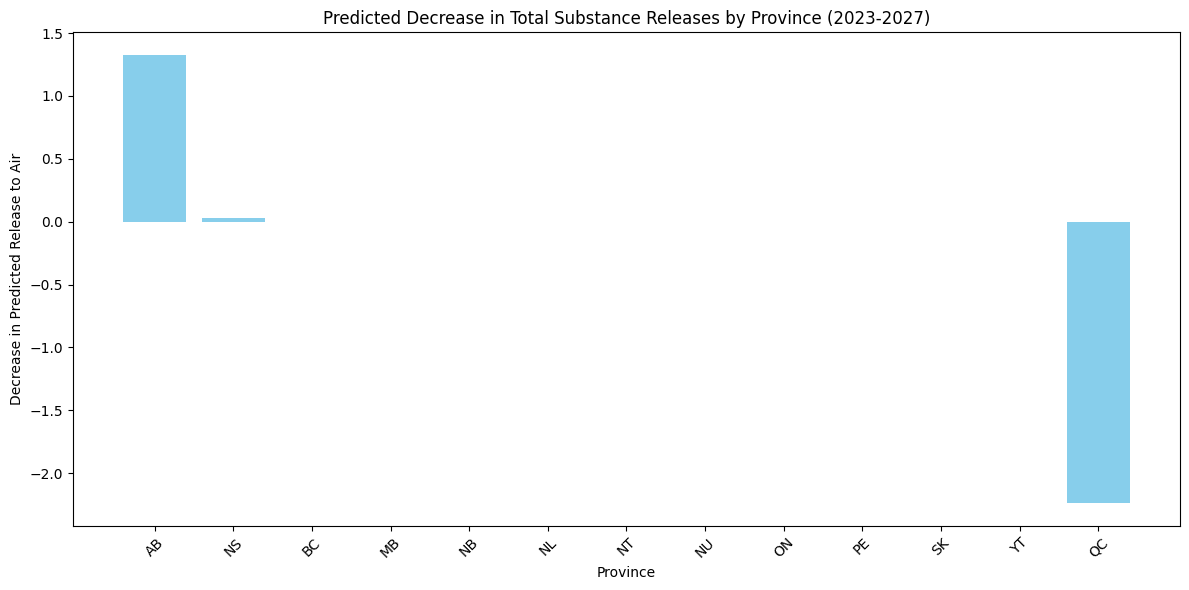

In [ ]:
# Calculate decreases for each province
decrease_analysis = total_predictions_Tnor.pivot(index='Province', columns='Year', values='Predicted_Release_to_Air')
decrease_analysis['Decrease'] = decrease_analysis[2023] - decrease_analysis[2027]

# Sort by largest decrease
decrease_analysis = decrease_analysis.sort_values(by='Decrease', ascending=False).reset_index()

# Display the province with the largest decrease
largest_decrease_province = decrease_analysis.head(1)
print("\nProvince with the largest decrease:")
print(largest_decrease_province)

# Visualization
import matplotlib.pyplot as plt

# Bar chart for decreases
plt.figure(figsize=(12, 6))
plt.bar(decrease_analysis['Province'], decrease_analysis['Decrease'], color='skyblue')
plt.title("Predicted Decrease in Total Substance Releases by Province (2023-2027)")
plt.xlabel("Province")
plt.ylabel("Decrease in Predicted Release to Air")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()